# Predicting Strokes

## Final Project Submission

Please fill out:
* __Student name:__ Cassarra Groesbeck
* __Student pace:__ Part Time/ Flex
* __Scheduled project review date/time:__ 
* __Instructor name:__ 
* __Blog post URL:__



# 1. Introduction 
Every year, more than 795,000 people in the United States have a stroke [CDC.gov](https://www.cdc.gov/stroke/facts.htm). About 610,000 of these are first or new strokes [CDC.gov](https://www.cdc.gov/stroke/facts.htm). About 87% of all strokes are ischemic strokes, in which blood flow to the brain is blocked [CDC.gov](https://www.cdc.gov/stroke/facts.htm). Strokes are the No. 5 cause of death and a leading cause of disability in the United States [American Stoke Association](https://www.stroke.org/en/about-stroke). From 1990 to 2019, the change in the prevalence of stroke in the general population *increased* by about 60% [newsroom.heart.org](https://newsroom.heart.org/news/u-s-stroke-rate-declining-in-adults-75-and-older-yet-rising-in-adults-49-and-younger). **80% of strokes are preventable** [American Stoke Association](https://www.stroke.org/en/about-stroke). 


## 1a. Objectives
Make stroke prediction using only 7 features.  


## 1b. Business Understanding
Kaiser Permenente is starting a new public health campaign about stroke prevention. The target audience are people 50+. Kaiser wants to provide an unofficial stroke-risk assessment to individuals through an app or online based interface. With the target audience in mind, Kaiser wants this to be as simple as possible.  An example marketing slogan could be, "take 7 minutes, answer 7 questions, to see if you are at risk of having a stroke" or "Know your 7." Again, bearing in mind this age range is not known for their tech savviness, the questions should be easy to answer multiple choice (ie categories) that can be read and answered quickly. This app or online feature can direct both members and non members to resources to better understand their risk factors based on the answers they provided. This is not an official diagnosis and is instead meant to direct people to conversations with their primary physician by giving them an interactive way to take their health into their own hands. 


# 2. Data Understanding
This dataset contains 5110 observations with 12 attributes (11 clinical features) for predicting stroke events. 


### 2a. Attribute Information
| Column     | Description   |
|------------|:--------------|
| `id`               | **unique identifier**  |
| `gender`           | **"Male", "Female" or "Other"**  |
| `age`              | **age of the patient** |
| `hypertension`     | **0 if the patient doesn't have hypertension, 1 if the patient has hypertension**  |
| `heart_disease`    | **0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease**   |
| `ever_married`     | **"No" or "Yes"**  |
| `work_type`        | **"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"**   |
| `Residence_type`   | **"Rural" or "Urban"**  |
| `avg_glucose_level`| **average glucose level in blood**  |
| `bmi`              | **body mass index** |
| `smoking_status`   | **"formerly smoked", "never smoked", "smokes" or "Unknown"***  |
| `stroke`           | **1 if the patient had a stroke or 0 if not**  |
|    **_*Note:_**      | _"Unknown" in_ `smoking_status` _means that the information is unavailable for this patient_ |


### 2b. Acknowledgements
Data comes from the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) and can be found on [kaggle](https://www.kaggle.com).

# 3. Imports

**If SMOTEN not loading you may need to update imbalanced-learn by unhashing below pip install**

In [1]:
# unhash to update imbalanced-learn. Needed for SMOTEN.
#pip install -U imbalanced-learn

**To bypass bypass multi-hour for loop** (at step "12a. Loop Through all Models, Imputers, Scaler, and Smote") **use "12a-alt. Import pickled `results` df" then skip to step 13**

In [ ]:
# See step 12a-alt to bypass multi-hour for loop and import pickled `results` dataframe needed for step 13

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9', "grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline

import xgboost
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTEN, SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, \
ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

seed = 42

# 4. Exploring the Raw Data

### 4a. Load and Visually Check the Data

In [3]:
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

In [4]:
# Visual check of raw df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 4b. Drop Unnecessary `id` Column

In [5]:
df = df.drop('id', axis=1)

### 4c. Identify Target feature, `stroke`

In [6]:
target = 'stroke'

### 4d. Exploratory Data Analysis Basics

In [7]:
df.shape

(5110, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4e. Exploring Nulls

In [10]:
# percent of missing data
f'{(201/5110)*100:.3}%'

'3.93%'

In [11]:
# just the nulls
bmi_nulls = df[df['bmi'].isnull()]
# `stroke` patients with missing `bmi` data
bmi_nulls['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

### 4f. Distribution of Values

In [12]:
print('-'*30)
print('Distribution of Target Feature')
print('-'*30)
print('COUNTS:')
print(df[target].value_counts())
print('- '*15)
print('PERCENTAGES:')
for value in [norm_value_count for norm_value_count \
                in enumerate(df[target].value_counts(normalize=True))]:
    print(f'{value[0]}\t{value[1]*100:.4}%')
print(f'Name: {target}, dtype: int64') # just for symmetry
print('-'*30)

------------------------------
Distribution of Target Feature
------------------------------
COUNTS:
0    4861
1     249
Name: stroke, dtype: int64
- - - - - - - - - - - - - - - 
PERCENTAGES:
0	95.13%
1	4.873%
Name: stroke, dtype: int64
------------------------------


In [13]:
show = df.drop(target, axis=1)

print("-"*30)
print(f'Distribution of Other Features')
print("-"*30)
for column in show.columns:
    print("-"*30)
    print(f"UNIQUE VALUES: {len(show[column].unique())}")
    if len(show[column].unique()) <= 5:
        print("- "*15)
        print(show[column].value_counts())
    else:
        print("- "*15)
        print(f'\t\t  MIN: {show[column].min()}')
        print(f'\t\t  MEAN: {round(show[column].mean())}')
        print(f'\t\t  MAX: {show[column].max()}')
        print((f'Name: {column}, dtype: float64')) 
    print("-"*30)

------------------------------
Distribution of Other Features
------------------------------
------------------------------
UNIQUE VALUES: 3
- - - - - - - - - - - - - - - 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 104
- - - - - - - - - - - - - - - 
		  MIN: 0.08
		  MEAN: 43.0
		  MAX: 82.0
Name: age, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 2
- - - - - - - - - - - - - - - 
0    4612
1     498
Name: hypertension, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 2
- - - - - - - - - - - - - - - 
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 2
- - - - - - - - - - - - - - - 
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------------
------------------------------
UNIQUE VALUES: 5
- 

### 4g. Visualizing the of Distribution of Values 

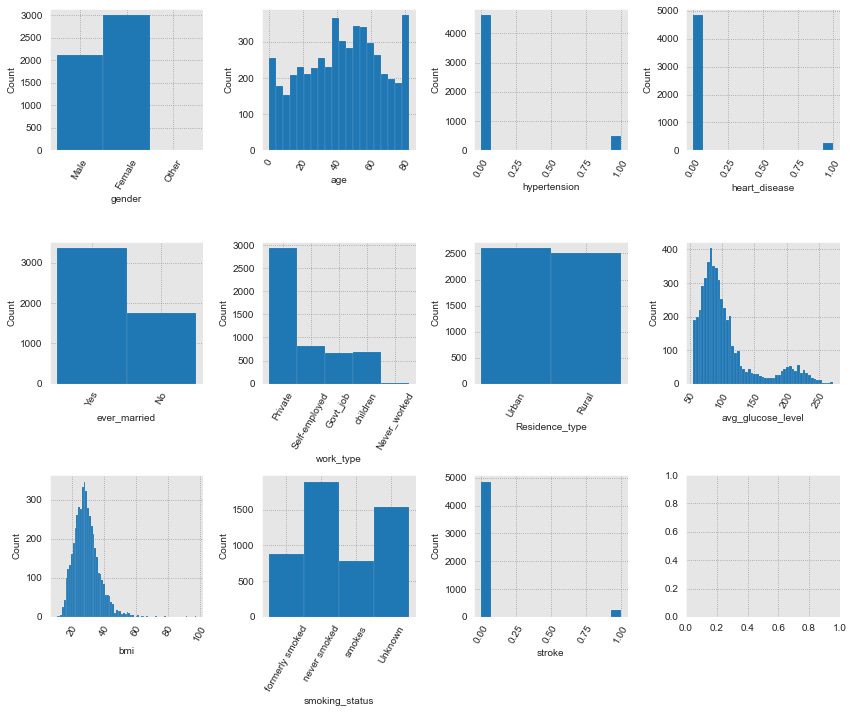

In [14]:
# setup
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 10))
fig.set_tight_layout(True)
# plot
for index, col in enumerate(df.columns):
    ax = axes[index//4][index%4]
    sns.histplot(data=df[col], ax=ax, linewidth=0.1, alpha=1)
    ax.tick_params(axis='x', rotation=60)

### '4. Exploring the Raw Data' NOTES:

1. `gender`
 - There is only 1 'other' value, for simplicity I will drop this 1 row.
 - About 1000 more women than men in this dataset.
2. `age`
 - The youngest patient is under 1 yo. Oldest patient is 82.
 - Decent distribution, 
 - Average age of patients in this dataset is 43 years old. 
3. `hypertension`
 - Binary, 1 if the patient has hypertension.
 - Very similar distribution as target feature.
4. `heart_disease`
 - Binary, 1 if the patient has heart disease.
 - Almost identical distribution as target feature.
 - I am curious how `hypertension` & `heart_disease` will correlate with eachother. 
5. `ever_married`
 - About 65/35 split with majority of patients listed as 'Yes.'
6. `work_type`
 - With only 5 categories it is not surprisingly, more than half answered 'Private.'
 - The other 4 make up little more than 40%.
 - 'Never_worked' is less than 1% (very likely children)
7. `Residence_type`
 - Almost 50/50 split between 'Urban' and 'Rural.'
8. `avg_glucose_level` & `bmi` 
 - continuous features that are both skewed positively.
    - `bmi` is missing 201 values (3.93%). Of those missing values, 40 are stroke patients.
    - because of this missing data an imputer is required for modeling
10. `smoking_status`
 - about 30% of patients are listed as 'Unknown.'


### 4h. As indicated above in EDA NOTES: Drop 1 'other' value in `gender`

In [15]:
data = df.drop(df[df['gender']=='Other'].index)

# 5. Seperate and Split Data

### 5a. Separate data into features and target

In [16]:
X = data.drop(target, axis = 1)
y = data[target]

### 5b. Split data into train and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    test_size=.2, 
                                                    random_state=seed)

# 6. Visualizing the `X_train` `y_train` data

### 6a. Make a visualization df

In [18]:
viz_df = pd.concat([X_train, y_train], axis=1)
viz_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


### 6b. Pair Plot
I will start with a pair plot; this will help me visualize relationships between each variable.

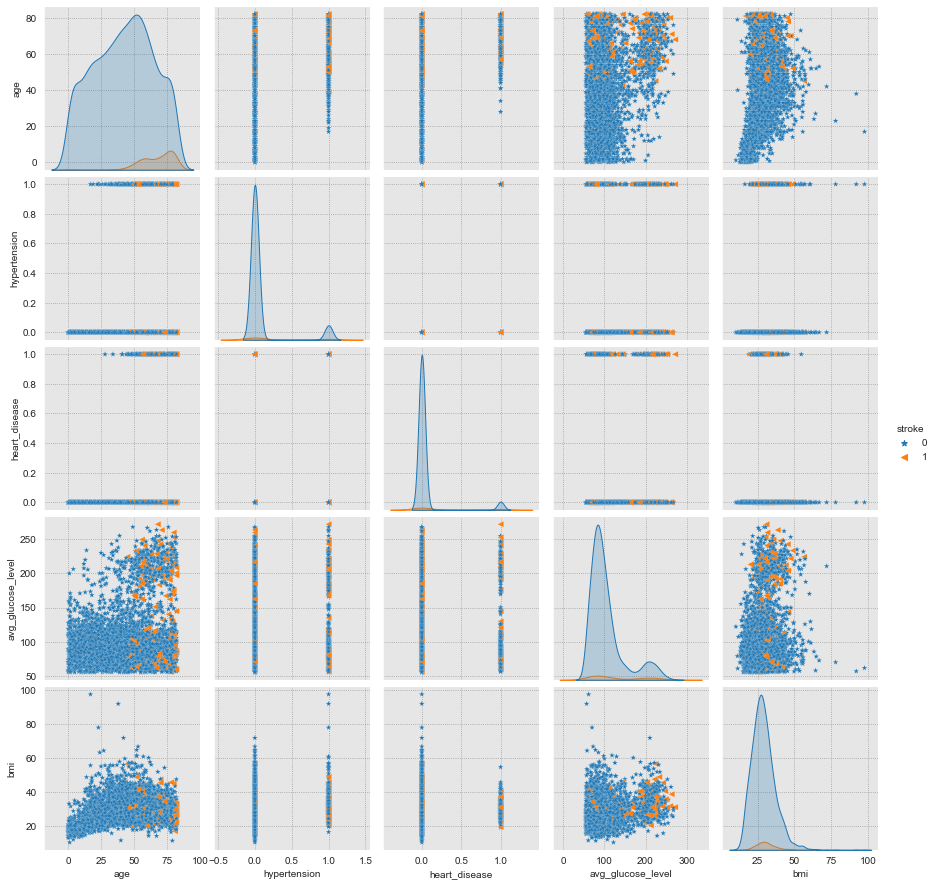

In [19]:
sns.pairplot(viz_df, hue='stroke', markers=['*','<'], plot_kws={'linewidth':0.1});

### '6b. Pair Plot' NOTES:
`age` appears to be an important feature. 

The pair plot is great when comparing continuous features, however, it is useless when comparing two binary features, notice `hypertension` - `heart_disease`. Technically these features are categorical, with 1 and 0 representing "Yes" and "No," so it is not surprising the pairplot does not reveal much about these features given they are masquerading around under the ruse of numeric values. On that same note, it is important to note, the pairplot excludes categorical features altogether. Notice `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` are absent. These features will need to be explored separately. But first, based on shortcomings of the pair plot, I would like to add a feature to better understand the relationship between hypertension and heart_disease. Secondly, based on the insight of the pairplot, I want to add a feature that separates out patients who are 50 and up. Next, I will break down `bmi` and `avg_glucose_level` into categorical ranges as this fits with the needs of the client to have multiple choice questions. 


# 7. Adding Features
Add features then explore the categorical features using `viz_df`. 
1. `age_50+`
 - The values in this column will be 
   - 1 : patients 50 and above
   - 0 : patients 49 and below 
   
   
2. `hyper_heart`
 - The values in this column will be 
   - 1 : patients with hypertension and heart disease 
   - 0 : if patients do not have BOTH hypertension and heart disease.
   
   
3. `bmi_range`
 - The values in this columns will be
   - 'underweight' : patients with bmi < 18.49
   - 'normal range' : patients with bmi between 18.5 and 24.9
   - 'overweight' : patients with bmi between 25.0 and 29.9 
   - 'obese' : patients with bmi 30 or greater
  - Values for bmi ranges determined by 'WHO classification of weight status' table [National Library of Medicine](https://www.ncbi.nlm.nih.gov/books/NBK535456/figure/article-18425.image.f1/).
  
  
4. `avg_glucose_range`
 - The values in this columns will depend on age
   - for children < 5.99 (0-5 years old) :
     - 'normal' : patients with average glucose level < 180
     - 'action suggested' : if greater
     - *note: I used 'action suggested' for children as I did not find much information on this age range and was uncomfortable labeling them 'diabetic' or 'pre-diabetic'*
   - for children between 6 and 10 
     - 'normal' : patients with average glucose level < 140 
     - 'action suggested' : if greater
   - for patients older than 10
     - 'normal' : patients with average glucose level < 116.99
     - 'prediabetic' : patients with average glucose level between 117 and 136.99
     - 'diabetic' : if greater that 137
  - Values for childrens ranges determined by 'Nationwide Children’s Hospital Diabetes Center Target Blood Glucose Ranges' table [Nationwide Children’s Hospital](https://www.nationwidechildrens.org/family-resources-education/health-wellness-and-safety-resources/resources-for-parents-and-kids/managing-your-diabetes/chapter-three-monitoring-blood-glucose).
  - Values for adult ranges determined by 'A1C and Estimated Average Glucose Levels' table [Medical News Today](https://www.medicalnewstoday.com/articles/a1c-chart-diabetes-numbers). This was the hardest as there is some discrepancy in these ranges. For example, the 'Nationwide Children’s Hospital Diabetes Center Target Blood Glucose Ranges' table groups anyone from ten years and up as having a target range from 70 to 120, however the 'A1C and Estimated Average Glucose Levels' table labels 'normal' as below 117. I chose to use the data from these two tables despite this discrepancy because they are from credible resources. 
  


### 7a. Make copies
Before I move forward I want to copy `X_train` and `X_test` in case I want as a reference later.

In [20]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

### 7b. Add Columns 

In [21]:
dfs = [viz_df, X_train, X_test]  

for df_to_add_to in dfs:
    # print for reference
    print("\t\t\t\t\tBEFORE ADDING COLUMNS")
    print(df_to_add_to.shape)
    display(df_to_add_to.head())
    
    # create lists for columns
    hyper_heart_col = []
    age_50_plus_col = []
    bmi_ranges = []
    avg_glucose_ranges = []
    
    for i in df_to_add_to.index:        
        # Populate hyper_heart_col list
        if (df_to_add_to['hypertension'][i]==1) and (df_to_add_to['heart_disease'][i]==1):
            hyper_heart_col.append(1)
        else:
            hyper_heart_col.append(0)
            
        # Populate age_50_plus_col list
        if df_to_add_to['age'][i] >= 50:
            age_50_plus_col.append(1)
        else:
            age_50_plus_col.append(0)
        
        # Populate bmi_ranges list
        if pd.isnull(df_to_add_to['bmi'][i]):
            bmi_ranges.append(np.NaN)
        elif (df_to_add_to['bmi'][i]<18.4):
            bmi_ranges.append('underwieght')
        elif (18.5 < df_to_add_to['bmi'][i] < 24.9):
            bmi_ranges.append('normal range')
        elif (25.0 < df_to_add_to['bmi'][i] < 29.9):
            bmi_ranges.append('overweight')
        else:
            bmi_ranges.append('obese') 
        
        # Populate avg_glucose_ranges list
        if df_to_add_to['age'][i] < 6:
            if df_to_add_to['avg_glucose_level'][i] < 180:
                avg_glucose_ranges.append('normal')
            else:
                avg_glucose_ranges.append('action suggested')
        elif 6 <= df_to_add_to['age'][i] < 10:
            if df_to_add_to['avg_glucose_level'][i] < 140:
                avg_glucose_ranges.append('normal')
            else:
                avg_glucose_ranges.append('action suggested')
        else:
            if df_to_add_to['avg_glucose_level'][i] < 117:
                avg_glucose_ranges.append('normal')
            elif 117 <= df_to_add_to['avg_glucose_level'][i] < 137:
                avg_glucose_ranges.append('pre-diabetic')
            else:
                avg_glucose_ranges.append('diabetic')

    # Add columns to dfs
    df_to_add_to['hyper_heart'] = hyper_heart_col
    df_to_add_to['age_50+'] = age_50_plus_col
    df_to_add_to['bmi_range'] = bmi_ranges
    df_to_add_to['avg_glucose_range'] = avg_glucose_ranges

    print("\t\t\t\t\tAFTER ADDING COLUMNS")
    print(df_to_add_to.shape)
    display(df_to_add_to.head())


					BEFORE ADDING COLUMNS
(4087, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


					AFTER ADDING COLUMNS
(4087, 15)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hyper_heart,age_50+,bmi_range,avg_glucose_range
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0,0,0,obese,normal
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0,0,0,normal range,normal
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0,0,0,normal range,pre-diabetic
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0,0,0,obese,normal
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0,0,0,obese,normal


					BEFORE ADDING COLUMNS
(4087, 10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown


					AFTER ADDING COLUMNS
(4087, 14)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hyper_heart,age_50+,bmi_range,avg_glucose_range
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0,0,obese,normal
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0,0,normal range,normal
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0,0,normal range,pre-diabetic
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0,0,obese,normal
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0,0,obese,normal


					BEFORE ADDING COLUMNS
(1022, 10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3667,Female,28.0,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked
2217,Female,3.0,0,0,No,children,Urban,93.30,19.5,Unknown
374,Female,53.0,0,0,Yes,Govt_job,Rural,64.40,31.0,smokes
2392,Male,35.0,0,0,Yes,Private,Rural,69.22,42.8,never smoked
299,Female,58.0,0,0,Yes,Private,Rural,94.30,29.1,Unknown


					AFTER ADDING COLUMNS
(1022, 14)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hyper_heart,age_50+,bmi_range,avg_glucose_range
3667,Female,28.0,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked,0,0,obese,normal
2217,Female,3.0,0,0,No,children,Urban,93.30,19.5,Unknown,0,0,normal range,normal
374,Female,53.0,0,0,Yes,Govt_job,Rural,64.40,31.0,smokes,0,1,obese,normal
2392,Male,35.0,0,0,Yes,Private,Rural,69.22,42.8,never smoked,0,0,obese,normal
299,Female,58.0,0,0,Yes,Private,Rural,94.30,29.1,Unknown,0,1,overweight,normal


### 7b check. Same number of NaN's in original `bmi` and new `bmi_range`?

In [22]:
viz_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  163
smoking_status         0
stroke                 0
hyper_heart            0
age_50+                0
bmi_range            163
avg_glucose_range      0
dtype: int64

# 8. Exploring Categorical Features

### 8a. Convert [0,1] Binary Features to Categorical 
Before I plot, I will convert those sneaky false numeric features into their true categorical form. This will make for better looking labels and visuals.

In [23]:
nums_to_cats = ['stroke', 'hypertension', 'heart_disease', 'hyper_heart', 'age_50+']

for feat in nums_to_cats:
    viz_df[feat] = viz_df[feat].map({1:'Yes', 0:'No'})
    
    
viz_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hyper_heart,age_50+,bmi_range,avg_glucose_range
845,Female,48.0,No,No,Yes,Private,Urban,69.21,33.1,never smoked,No,No,No,obese,normal
3745,Female,29.0,No,No,No,Private,Urban,84.19,21.2,never smoked,No,No,No,normal range,normal
4184,Female,35.0,No,No,Yes,Private,Rural,119.40,22.9,never smoked,No,No,No,normal range,pre-diabetic
3410,Male,38.0,No,No,Yes,Private,Rural,108.68,32.7,never smoked,No,No,No,obese,normal
284,Male,14.0,No,No,No,Govt_job,Urban,82.34,31.6,Unknown,No,No,No,obese,normal


### 8b. Plotting the Distribution of Categorical Features from `viz_df`

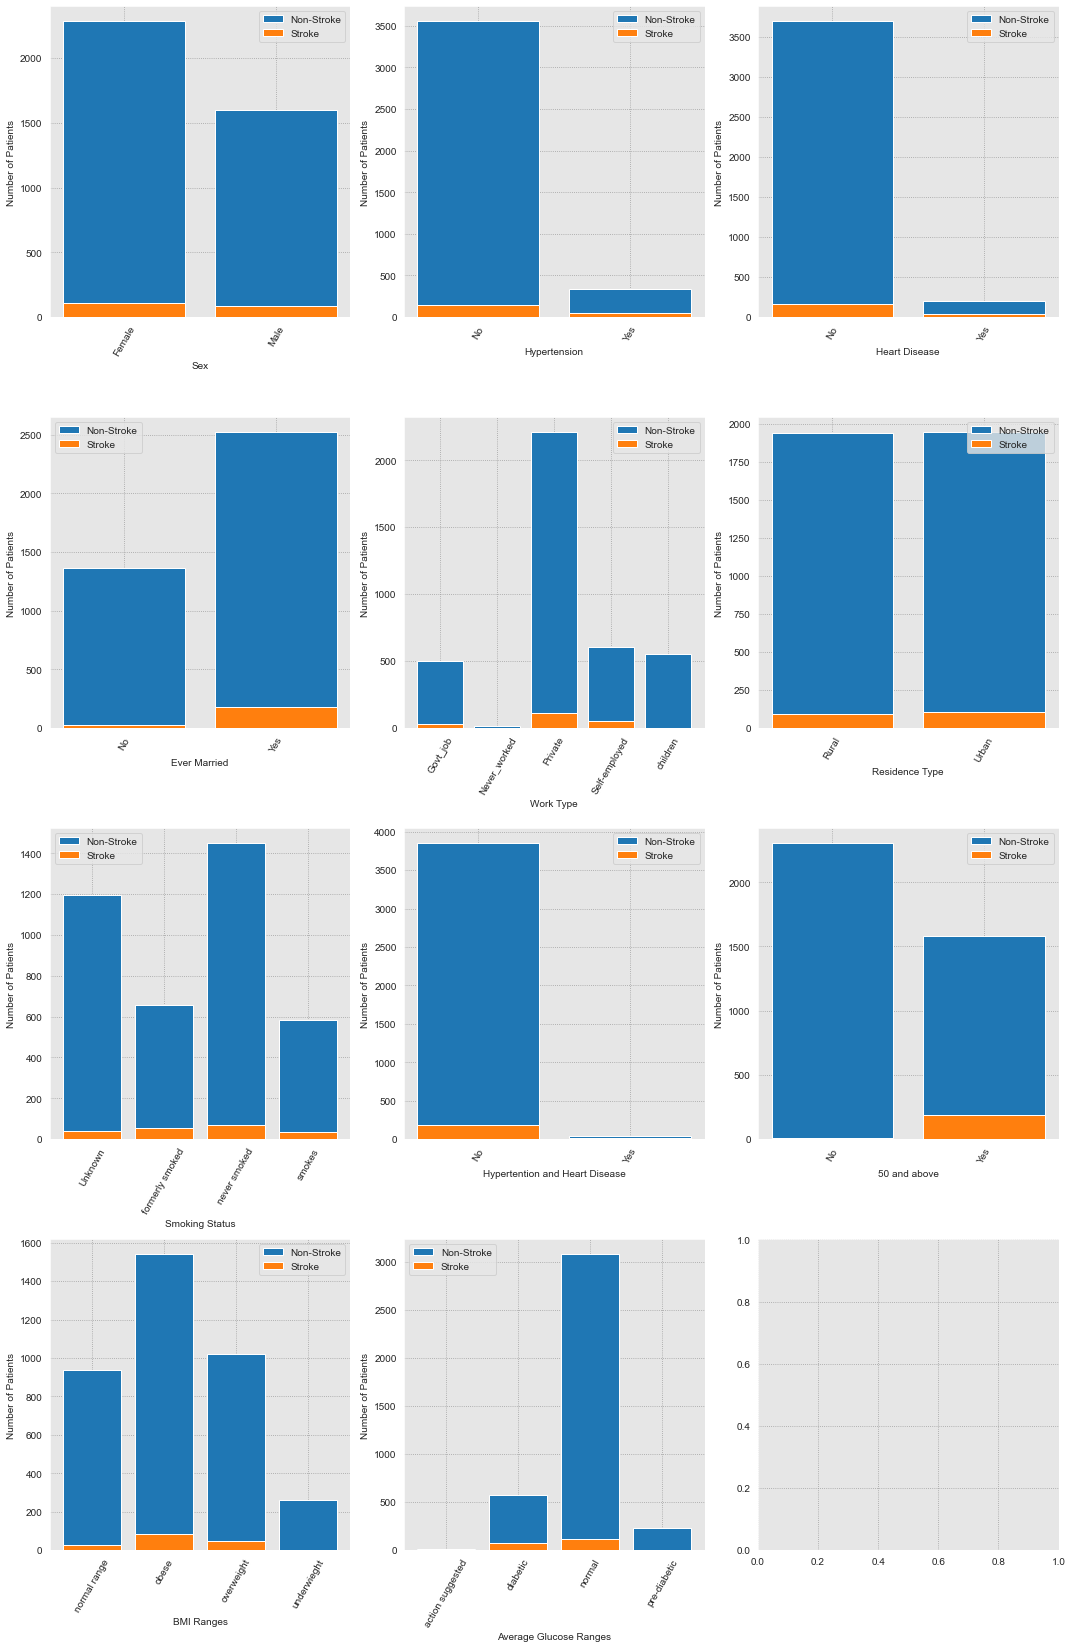

In [24]:
# Set up plot
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15, 23))
fig.set_tight_layout(True)

# Lists for loops
feats = ['gender',
         'hypertension',
         'heart_disease',
         'ever_married',
         'work_type',
         'Residence_type',
         'smoking_status', 
         'hyper_heart',
         'age_50+', 
         'bmi_range', 
         'avg_glucose_range']

titles = ['Sex',
         'Hypertension',
         'Heart Disease',
         'Ever Married',
         'Work Type',
         'Residence Type',
         'Smoking Status',
         'Hypertention and Heart Disease', 
         '50 and above',
         'BMI Ranges', 
         'Average Glucose Ranges']

vals = ['No', 'Yes']

labels = ['Non-Stroke','Stroke']


for i in range(len(feats)):
    # Set up plots
    ax = axes[i//3][i%3]
    ax.set(xlabel=titles[i], ylabel='Number of Patients')
    
    for index in range(2):
        # Define the df 
        bar_df = viz_df[viz_df['stroke']==vals[index]]
        count_df = pd.DataFrame(bar_df.groupby([feats[i]])[feats[i]].count())
        plot_df = count_df.rename(columns={feats[i]: 'count'}).reset_index()

        # Plot
        ax.bar(plot_df[feats[i]], plot_df['count'], label=labels[index]) 
        ax.tick_params(axis='x', rotation=60)
        ax.legend();
        

### 8c. Exploring `never_married`

In [25]:
never_married = viz_df[viz_df['ever_married']=='No']
under_25 = never_married[never_married['age']<25]
under_50yo = never_married[never_married['age']<50]

print(f"""Of the {len(never_married)} never married patients
{round(len(under_25)/len(never_married),2)*100}% are children and young adults (under 25)""")

Of the 1390 never married patients
68.0% are children and young adults (under 25)


### '8. Exploring Categorical Features' NOTES:
The added feature `age_50+` further suggests that age is the most significant feature. Other important factors seem to be `bmi_range`, and `avg_glucose_range`, sex (`gender`), `hypertension`, `heart_disease`, & `smoking_status`. 

The least important feature appears to be `Resident_type` followed by `work_type` then `ever_married`. `ever_married` is visually misleading however, as shown above, 68% of 'never_married' patients and under 25 years old. 

Of the added features:
- I will keep:
 - `age_50+`
 - `bmi_range`
 - `avg_glucose_range`


- And drop: 
 - `hyper_heart`
 

Of the original features: 
- I will drop the 3 continuous features (*note: they have been replaced with the added categorical features*)
 - `age`
 - `bmi`
 - `avg_glucose_level`
 

# 9. Drop Features

In [26]:
dfs = [X_train, X_test] 

feats_to_drop = ['age', 'bmi', 'avg_glucose_level', 'hyper_heart']

for df_to_drop_from in dfs:    
    # print for reference
    print("\t\t\t\t\tBEFORE DROPPING COLUMNS")
    print(df_to_drop_from.shape)
    display(df_to_drop_from.head())
    
    # drop features 
    #df_to_drop_from = 
    df_to_drop_from.drop(feats_to_drop, axis=1, inplace=True)
    
    # reprint after drops
    print("\t\t\t\t\tAFTER DROPPING COLUMNS")
    print(df_to_drop_from.shape)
    display(df_to_drop_from.head()) 

					BEFORE DROPPING COLUMNS
(4087, 14)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hyper_heart,age_50+,bmi_range,avg_glucose_range
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0,0,obese,normal
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0,0,normal range,normal
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,0,0,normal range,pre-diabetic
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,0,0,obese,normal
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0,0,obese,normal


					AFTER DROPPING COLUMNS
(4087, 10)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_50+,bmi_range,avg_glucose_range
845,Female,0,0,Yes,Private,Urban,never smoked,0,obese,normal
3745,Female,0,0,No,Private,Urban,never smoked,0,normal range,normal
4184,Female,0,0,Yes,Private,Rural,never smoked,0,normal range,pre-diabetic
3410,Male,0,0,Yes,Private,Rural,never smoked,0,obese,normal
284,Male,0,0,No,Govt_job,Urban,Unknown,0,obese,normal


					BEFORE DROPPING COLUMNS
(1022, 14)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hyper_heart,age_50+,bmi_range,avg_glucose_range
3667,Female,28.0,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked,0,0,obese,normal
2217,Female,3.0,0,0,No,children,Urban,93.30,19.5,Unknown,0,0,normal range,normal
374,Female,53.0,0,0,Yes,Govt_job,Rural,64.40,31.0,smokes,0,1,obese,normal
2392,Male,35.0,0,0,Yes,Private,Rural,69.22,42.8,never smoked,0,0,obese,normal
299,Female,58.0,0,0,Yes,Private,Rural,94.30,29.1,Unknown,0,1,overweight,normal


					AFTER DROPPING COLUMNS
(1022, 10)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_50+,bmi_range,avg_glucose_range
3667,Female,1,0,Yes,Govt_job,Rural,never smoked,0,obese,normal
2217,Female,0,0,No,children,Urban,Unknown,0,normal range,normal
374,Female,0,0,Yes,Govt_job,Rural,smokes,1,obese,normal
2392,Male,0,0,Yes,Private,Rural,never smoked,0,obese,normal
299,Female,0,0,Yes,Private,Rural,Unknown,1,overweight,normal


# 10. Convert `X_train` and `X_test` df values from 0 & 1 to "Yes" & "No"

In [27]:
nums_to_cats = ['hypertension', 'heart_disease', 'age_50+']

for df_to_alter in dfs:    
    # print for reference
    print("\t\t\t\t\tBEFORE DROPPING COLUMNS")
    print(df_to_alter.shape)
    display(df_to_alter.head())
    
    for feat in nums_to_cats:
        df_to_alter[feat] = df_to_alter[feat].map({1:'Yes', 0:'No'})
    
    # reprint after drops
    print("\t\t\t\t\tAFTER DROPPING COLUMNS")
    print(df_to_alter.shape)
    display(df_to_alter.head()) 

					BEFORE DROPPING COLUMNS
(4087, 10)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_50+,bmi_range,avg_glucose_range
845,Female,0,0,Yes,Private,Urban,never smoked,0,obese,normal
3745,Female,0,0,No,Private,Urban,never smoked,0,normal range,normal
4184,Female,0,0,Yes,Private,Rural,never smoked,0,normal range,pre-diabetic
3410,Male,0,0,Yes,Private,Rural,never smoked,0,obese,normal
284,Male,0,0,No,Govt_job,Urban,Unknown,0,obese,normal


					AFTER DROPPING COLUMNS
(4087, 10)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_50+,bmi_range,avg_glucose_range
845,Female,No,No,Yes,Private,Urban,never smoked,No,obese,normal
3745,Female,No,No,No,Private,Urban,never smoked,No,normal range,normal
4184,Female,No,No,Yes,Private,Rural,never smoked,No,normal range,pre-diabetic
3410,Male,No,No,Yes,Private,Rural,never smoked,No,obese,normal
284,Male,No,No,No,Govt_job,Urban,Unknown,No,obese,normal


					BEFORE DROPPING COLUMNS
(1022, 10)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_50+,bmi_range,avg_glucose_range
3667,Female,1,0,Yes,Govt_job,Rural,never smoked,0,obese,normal
2217,Female,0,0,No,children,Urban,Unknown,0,normal range,normal
374,Female,0,0,Yes,Govt_job,Rural,smokes,1,obese,normal
2392,Male,0,0,Yes,Private,Rural,never smoked,0,obese,normal
299,Female,0,0,Yes,Private,Rural,Unknown,1,overweight,normal


					AFTER DROPPING COLUMNS
(1022, 10)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_50+,bmi_range,avg_glucose_range
3667,Female,Yes,No,Yes,Govt_job,Rural,never smoked,No,obese,normal
2217,Female,No,No,No,children,Urban,Unknown,No,normal range,normal
374,Female,No,No,Yes,Govt_job,Rural,smokes,Yes,obese,normal
2392,Male,No,No,Yes,Private,Rural,never smoked,No,obese,normal
299,Female,No,No,Yes,Private,Rural,Unknown,Yes,overweight,normal


# 11. Function: `check_model` 

This function does all the heavy lifting for me. Not only can it establish baseline models (no scaling and no smote) but it can also handle gridsearch. 

It returns:
- the fitted model
   - to calculate and save scores to a df (vs reading classification report)
- text of the model it is fitted to (in an easy to copy and paste format), 
   - so a gridsearch-parameters-model details can be saved and quickly re run later using test data
   
Important options within the function:
- change out imputers
- change out scalers, or skip altogether
- change or skip smote techniques
- use or skip gridsearch
- use test or train data to evaluate model performance on
- change display labels for confusion matrix

Optional outputs:
- print model details
- show classification report 
- show thresholds table  
- plot confusion matrix and roc curve


In [28]:
def check_model(model,
                X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test, 
                random_state=seed, 
                imputer=None,
                smote=None,             
                scaler=None,
                grid_search=False,
                use_test_data=False, 
                print_model_details=False,
                show_classification_report=False, 
                show_thresholds_table=False,  
                show_plots=False,
                display_labels=None):
    
    """   
    
    Uses sklearn.pipeline.Pipeline, sklearn.compose.ColumnTransformer, & imblearn.pipeline.Pipeline 
    to scale, using any sklearn scaler (this step is optional), one hot encode, using 
    sklearn.preprocessing.OneHotEncoder, impute, using any sklearn imputer (this step is optional), 
    and smote (Synthetic Minority Over-sampling Technique), using any sklearn smote technique (this step 
    is optional), to transform the data. Then, either fit that pipeline-model or feed it into 
    sklearn.model_selection.GridSearchCV then fit the girdsearch-model. By default GridSearch is bypassed
    with grid_search=False.
    
    
    Output
    ---------- 
    (optional) Print model details
    (optional) Classification Report
    (optional) Thresholds, FPRs, TPRs Stats Table with AUC score
    (optional) Plots Confusion matrix and ROC curve
    
    
    Returns
    ----------
    Trained model (model.fit(X_train, y_train))
    
    
    Parameters
    ----------
 
    model : supervised learning model to be evaluated. 
    
    X_train : pandas data frame, default=X_train
    
    X_test : pandas data frame, default=X_test
                
    y_train : pandas series, default=y_train,
                
    y_test : pandas series, default=y_test
    
    pipe_grid_param_dict : dict or list of dictionaries
        sklearn.model_selection.GridSearchCV parameter: 
            Dictionary with parameters names (`str`) as keys and lists of
            parameter settings to try as values, or a list of such
            dictionaries, in which case the grids spanned by each dictionary
            in the list are explored. This enables searching over any sequence
            of parameter settings.
    
    random_state : int or RandomState instance, default=42
        Controls the shuffling applied to the data before applying the split.
        Pass an int for reproducible output across multiple function calls.
        
    imputer : any sklearn imputer, default=None
        Transformers for missing value imputation
        NOTE: Because the data has NaN values, an sklearn imputer must be specified.
    
    smote : any sklearn smote technique, default=None
        Synthetic Minority Over-sampling Technique
    
    scaler : any sklearn preprocessing scaler, default=None
    
    grid_search : False or dict or list of dictionaries, default=False
        If not set to False, this should be a dict for GridSearchCV param_grid.
            sklearn.model_selection.GridSearchCV parameter: 
                Dictionary with parameters names (`str`) as keys and lists of
                parameter settings to try as values, or a list of such
                dictionaries, in which case the grids spanned by each dictionary
                in the list are explored. This enables searching over any sequence
                of parameter settings.

    use_test_data : boolean True or False, default=False
        Determines the data used to asses model performance.
        
    print_model_details : boolean True or False, default=False
        Determines if function prints details about classifier, imputer, scaler (if used),
        and smote technique (if used).
        Example: 
            LogisticRegression(random_state=42, C=1.0, fit_intercept=True, max_iter=100, solver='lbfgs')
            KNNImputer()
            StandardScaler()
            SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], random_state=42)
            
    
    show_thresholds_report : boolean True or False, default=False
        Print table with AUC score, Thresholds, FPR's and TPR's
    
    show_plots : boolean True or False, default=False
        Plots Confusion Matrix and ROC curve.
    
    display_labels : list or 'None', default=None
        If the target is binary 0,1 the labels can be changed to more descriptive labels. 
        Example: ['Healthy', 'HeartDisease']

    """

    
    ######################################################################
    # 1. TRANSFORM-DATA PIPELINE                                         #
    ######################################################################   
    
    
    # 1a. Seperate by type of data
    cat_col_names = []
    for col in X_train.columns:
        if (col in X_train.select_dtypes('object').columns) or (sorted(X_train[col].unique())==[0,1]):
            cat_col_names.append(col)
            
    
    X_train_cat = X_train[cat_col_names]
    X_train_nums = X_train.drop(cat_col_names, axis=1)
    
    
    # 1b. Pipeline 1 (numerical data)
    numerical_pipeline = Pipeline(steps=[
        ('scaler', scaler)])
    
    
    # 1c. Pipeline 2 (categorical data)  
    categorical_pipeline = Pipeline(steps=[
        ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])


    # 1d. Converge pipelines 1 & 2
    trans = ColumnTransformer(transformers=[
        ('numerical', numerical_pipeline, X_train_nums.columns),
        ('categorical', categorical_pipeline, X_train_cat.columns)],
                             remainder='passthrough')
        
    
    # 1e. Model with converged pipeline
    model_pipe = imbpipeline(steps=[
        ('trans', trans),
        ('imputer', imputer),
        ('smote', smote),
        ('model', model)])

    
    ######################################################################
    # 2. GRID SEARCH PIPELINE                                            #
    ######################################################################   
    

    # 2a. Determine if using gridsearch
    if grid_search != False:
        best_model = GridSearchCV(estimator=model_pipe, 
                           param_grid=grid_search, 
                           scoring='f1', 
                           cv=3)

        
        # fit the model to evaluate
        fit_model = best_model.fit(X_train, y_train) 
        
        
        ######### To have access to GS best_params when print_model_details=False 
        
        # 2b. Use .best_params_ dict and reformat to print the same way 
        #     classifiers/scalers/imputers etc are instantiated.
        #
        #        Example: 
        #       ----------
        #           .best_params_ = {'model__criterion': 'gini', 
        #                            'model__max_depth': 6, 
        #                            'scaler__with_mean': True} 
        #
        #            prints as: 
        #                DecisionTreeClassifier(criterion='gini', max_depth=6, ..., N-param=N-value) 
        #                StandardScaler(with_mean=True)
        #
        kind_of_params = {}
        for k,v in fit_model.best_params_.items(): #<--.best_params_ dict
            key = k.split("__")[0]
            if key not in kind_of_params.keys():
                kind_of_params[key] = "" 
            if k.split("__")[1] == 'solver':
                kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # solver has qoutes around it
            elif k.split("__")[1] == 'criterion':
                kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # criterion has qoutes around it
            elif k.split("__")[1] == 'class_weight':
                if str(v) == 'balanced':
                    kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # class_weight='balanced' <-- qoutes
                else:
                    kind_of_params[key] += k.split("__")[1]+"="+str(v)+", "        
            else: 
                kind_of_params[key] += k.split("__")[1]+"="+str(v)+", " #<-- notice comma
        #
        #
        # 2c. Remove extra comma at end of each dic value
        for k, v in kind_of_params.items():
            kind_of_params[k] = v[:-2]
        #
        #
        # 2d. Save in copy paste format:
        # Ex. DecisionTreeClassifier(criterion='gini', ..., paramN=value)
        if 'model' in  kind_of_params.keys():
            model_text = str(model).split(")")[0]+", "+kind_of_params['model']+")"
        #
        #
        ######### End best param labels section
    
    
    # 2a cont. if grid_search=False then 
    else: 
        
        # .fit converged pipeline
        fit_model = model_pipe.fit(X_train, y_train) 
        # save model_text
        model_text = str(model)
   

    ######################################################################
    # 3. (Optional) PRINT MODEL DETAILS                                  #
    ######################################################################

    
    # 3a. Determine if print_model_details=True
    if print_model_details: 
        
        # 3b. Determine if using GridSearch
        if grid_search:
            
            # 3c. Print the Details
            if 'model' in  kind_of_params.keys():
                #model_text = str(model).split(")")[0]+", "+kind_of_params['model']+")"
                print(model_text) 
            else: 
                print(model) # otherwise, use what was fed into function
            

            if 'imputer' in kind_of_params.keys():
                imputer_text = str(imputer).split("()")[0]+"("+kind_of_params['imputer']+")"
                print(imputer_text)
            else:
                print(imputer)


            if scaler != None:
                if 'scaler' in kind_of_params.keys():
                    scaler_text = str(scaler).split("()")[0]+"("+kind_of_params['scaler']+")"
                    print(scaler_text) 
                else:
                    print(scaler)  


            if smote != None:
                if 'smote' in kind_of_params.keys():
                    smote_text = str(smote).split(")")[0]+", "+kind_of_params['smote']+")"
                    print(smote_text)
                else:
                    print(smote)

        # 3d. If bypassing GridSearch, print what was fed into function, example: DecisionTreeClassifier()           
        else: 

            # model & imputer are manditory
            print(model)  
            print(imputer)

            # scaler and/or smote are optional (will not print if not used) 
            if scaler != None:  
                print(scaler)
            if smote != None:
                print(smote)

    # 3e. Print type of data used in model evaluation
    if use_test_data:
        data_used_text = "Test"
    else:
        data_used_text = "Train"


    ######################################################################
    # 4. (Optional) CLASSIFICATION REPORT                                #
    ######################################################################

    
    # 4a. Assign variables based on data using for evaluation
    if use_test_data:
        X_true = X_test
        y_true = y_test
    else: 
        X_true = X_train
        y_true = y_train
        
    
    if show_classification_report:
        # 4b. Make predictions and print report 
        y_preds = fit_model.predict(X_true)
        cr = classification_report(y_true, y_preds, digits=4)
        print()
        print('-'*54)
        print(f'\t  CLASSIFICATION REPORT : {data_used_text} Data')
        print('-'*54)
        print(cr)
        print('-'*54)
        

        
    ######################################################################
    # 5. (Optional) THRESHOLDS TABLE                                     #
    ######################################################################   
   

    # 5a. Determine if show_thresholds_table=True
    if show_thresholds_table:
        # 5b. Calculate the probability scores
        if ('LogisticReg' in str(model)):
            y_score = fit_model.decision_function(X_true) 
            fpr, tpr, thresholds = roc_curve(y_true, y_score)
        else:
            y_score = fit_model.predict_proba(X_true)
            fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1]) # <-- probability of Class 1

        # 5c. Format values and print
        # To display as: THRESHOLD: value | FPR: percent%, TPR:percent%
        thresh_fp_tp = list(zip(thresholds, fpr, tpr))
        these_to_print = [f'THRESHOLD: {e[0]:.2f} | FPR: {e[1]:.2%}, TPR:{e[2]:.2%}' \
                          for e in thresh_fp_tp]        
        auc_score = auc(fpr, tpr)
        
        print('-'*54)
        print('\t\t  THRESHOLD STATS')
        print('-'*54)
        print(f'AUC: {auc_score}')
        print('- '*23)
        for element in these_to_print:
            print(element)
        print('-'*54)
        

    ######################################################################
    # 6. (Optional) VISUALIZATIONS                                       #
    ######################################################################
    
    
    if show_plots: 
        # Figure set up
        plt.style.use('fivethirtyeight')
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
        fig.suptitle(f'Model Evaluated on {data_used_text} Data', color='tab:blue', size=14)
        

        # Left  
        axes[0].set_title("Confusion Matrix", size=15)  
        axes[0].grid(False)
        plot_confusion_matrix(fit_model, X_true, y_true, 
                              cmap=plt.cm.Blues, 
                              ax=axes[0], 
                              display_labels=display_labels,
                              normalize='true')

        # Right 
        axes[1].set_title("ROC Curve", size=15)
        plot_roc_curve(fit_model, X_true, y_true, ax=axes[1]);
        
    
    return fit_model, model_text


print("ran")

ran


# 11. Set up for modeling
- 11a. Instantiatiations 
- 11b. GridSearch dictionaries
- 11c. Create reduced `X_train` & `X_test` (using only 7 features)
- 11d. Create lists for the modeling loop
- 11e. Create empty `results` data frame to store results from the modeling loop

### 11a. Instantiations
Below I will instantiate the classifiers, imputers, and scalers. Smote class will be instantiated in for loop as which one to use depends on the data. 

**11a - 1. Base Models**

In [29]:
log_reg = LogisticRegression(random_state=seed) 

d_tree = DecisionTreeClassifier(random_state=seed) 

XGB = XGBClassifier(random_state=seed)

forest = RandomForestClassifier(random_state=seed) #class_weight

bag_tree = BaggingClassifier(DecisionTreeClassifier(random_state=seed))

abc = AdaBoostClassifier(random_state=seed)

etr = ExtraTreesClassifier(random_state=seed)

gbc = GradientBoostingClassifier(random_state=seed)

xgboost_XGB = xgboost.XGBClassifier(random_state=seed, objective='binary:logistic')

knn = KNeighborsClassifier()

**11a - 2. Imputers**

In [30]:
iter_imputer = IterativeImputer(random_state=seed)

sim_immputer = SimpleImputer()

knn_imputer =  KNNImputer()

**11a - 3. Scaler**

In [31]:
scaler = StandardScaler()

### 11b. GridSearchCV Dictionaries

In [32]:
# Create class_weight_dic for the GridSearchCV dictionaries
zero = round(data[target].value_counts(normalize=True)[1],6)
one = round(data[target].value_counts(normalize=True)[0],6)
class_weight_dic={0:zero, 1: one}

 
log_reg_dict = {'model__C' : [1.0, 1e12],
                'model__fit_intercept' : [True, False],
                'model__class_weight' : ['balanced', class_weight_dic],
                'model__solver' : ['lbfgs','liblinear'],
                'model__max_iter' : [100,500]}

d_tree_dict = {'model__criterion' : ['gini', 'entropy'],
               'model__max_depth' : [2, 6, 10],
               'model__min_samples_split' : [2,10],
               'model__min_samples_leaf' : [1, 6],
               'model__class_weight' : ['balanced', class_weight_dic]}

XGB_dict = {'model__learning_rate' : [0.1, 0.2],
            'model__max_depth' : [2, 6, 10],
            'model__min_child_weight' : [1, 2],
            'model__subsample' : [0.5, 0.7],
            'model__n_estimators' : [100]}

forest_dict = {'model__n_estimators' : [100],
               'model__criterion' : ['gini', 'entropy'],
               'model__max_depth' : [2, 6, 10],
               'model__class_weight' : ['balanced', class_weight_dic],
               'model__min_samples_leaf': [3, 6]}

bagg_dict = {'model__max_features' : [2, 5], 
             'model__n_estimators' : [100]}

abc_dict = {'model__base_estimator' : [DecisionTreeClassifier(max_depth=2, 
                                                              random_state=seed, 
                                                              class_weight='balanced'),
                                      DecisionTreeClassifier(max_depth=2, 
                                                              random_state=seed, 
                                                              class_weight=class_weight_dic)], 
            'model__learning_rate' : [0.1, 0.3]}

x_tree_dict = {'model__criterion' : ['gini', 'entropy'], 
               'model__max_depth' : [2, 6, 10],
               'model__class_weight' : ['balanced', class_weight_dic],
               'model__min_samples_split' : [2,10],
               'model__min_samples_leaf' : [1, 6]}

gbc_dict = {'model__max_depth' : [2, 6, 10],
            'model__min_samples_split' : [2,10],
            'model__min_samples_leaf' : [1, 6],
            'model__max_features' : [2, 5]}

xgboost_XGB_dict = {'model__learning_rate' : [0.1, 0.2],
                    'model__max_depth' : [2, 6, 10],
                    'model__min_child_weight' : [1, 2],
                    'model__subsample' : [0.5, 0.7],
                    'model__n_estimators' : [100]}

knn_dict = {'model__weights' : ['uniform', 'distance'],
           'model__n_neighbors' : [3, 5]}

### 11c. Create Reduced `X_train` & `X_test` DF's

`X_train_7`: 
 1. gender
 2. hypertension
 3. heart_disease
 4. smoking_status
 5. age_50
 6. bmi_range
 7. avg_glucose_range

In [33]:
X_train_7 = X_train.drop(['ever_married', 'work_type', 'Residence_type'], axis=1)
X_test_7 = X_test.drop(['ever_married', 'work_type', 'Residence_type'], axis=1)

display(X_train_7.head())
X_test_7.head()

,gender,hypertension,heart_disease,smoking_status,age_50+,bmi_range,avg_glucose_range
845,Female,No,No,never smoked,No,obese,normal
3745,Female,No,No,never smoked,No,normal range,normal
4184,Female,No,No,never smoked,No,normal range,pre-diabetic
3410,Male,No,No,never smoked,No,obese,normal
284,Male,No,No,Unknown,No,obese,normal


,gender,hypertension,heart_disease,smoking_status,age_50+,bmi_range,avg_glucose_range
3667,Female,Yes,No,never smoked,No,obese,normal
2217,Female,No,No,Unknown,No,normal range,normal
374,Female,No,No,smokes,Yes,obese,normal
2392,Male,No,No,never smoked,No,obese,normal
299,Female,No,No,Unknown,Yes,overweight,normal


### 11d. Create Lists for the Loop

In [34]:
dfs = ['original', 'all_categorical', '7']


models = [log_reg,
          d_tree,
          XGB, 
          forest, 
          bag_tree, 
          abc, 
          etr, 
          gbc, 
          xgboost_XGB, 
          knn]

model_names = ['LogisticRegression',
               'DecisionTreeClassifier',
               'XGBClassifier', 
               'RandomForestClassifier', 
               'BaggingClassifier', 
               'AdaBoostClassifier', 
               'ExtraTreesClassifier', 
               'GradientBoostingClassifier', 
               'xgboost.XGBClassifier', 
               'KNeighborsClassifier']


imputers = [iter_imputer, 
            sim_immputer, 
            knn_imputer]

imputer_names = ['IterativeImputer', 
                  'SimpleImputer', 
                  'KNNImputer']


scalers = [None, scaler]

scaler_names = ['None', 'StandardScaler']


model_dictionaries = [log_reg_dict, 
                      d_tree_dict, 
                      XGB_dict, 
                      forest_dict,
                      bagg_dict,
                      abc_dict, 
                      x_tree_dict,
                      gbc_dict, 
                      xgboost_XGB_dict,
                      knn_dict]

### 11e. Create Empty `results` Data Frame to Store Results

In [35]:
results = pd.DataFrame(columns = ['df_used', 
                                  'base_model', 
                                  'imputer', 
                                  'scaler', 
                                  'smote', 
                                  'GS',
                                  'final_model_evaluated',
                                  'f1',
                                  'train_recall', 
                                  'test_recall']) 

results.head()

,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall


# 12. Modeling with loops

Using for loop to loop through the 3 different types of data sets (original data with continuous features, 10 categorical features, and 7 categorical features). For each data set, it loops through the ten base models (see 11a - 1. Base Models). For those ten base models, some form of imputation is required due to NaNs in `bmi` (or `bmi_ranges` depending on the dataset used) so the loop runs through 3 different ways of imputing data (IterativeImputer, SimpleImputer, KNNImputer). Scaling, smote, and grid search are optional so each base models loops through with and without these. As well as every relative combination of the prementioned factors (scaling not relative to all categorical data so this step is skipped when appropiate). When data is scaled StandardScaler is used. When smote is used SMOTENC or SMOTEN is used, depending on weather or not data is all categorical or not. Finally, the stores model details in `results` df. 

### 12a-alt. Import pickled `results` df
12a is a multi-hour for loop. It can be bypassed by loading the pickled `results` df. Unhash the below cell then go to step 13.

In [ ]:
#results = pd.read_pickle("./results_df.pkl") 

### 12a. Loop Through all Models, Imputers, Scaler, and Smote

In [36]:
num_of_loops = 0

# For each df
for idex in dfs:
    if idex == 'original':
        use_this_X_train = X_train_original
        use_this_X_test = X_test_original
    elif idex == 'all_categorical':
        use_this_X_train = X_train
        use_this_X_test = X_test
    else:
        use_this_X_train = X_train_7
        use_this_X_test = X_test_7

       
    # Through Models
    for i in range(len(models)):
        model = models[i]
        model_name = model_names[i]
        
        num_of_loops += 1 
        print(f'{num_of_loops} of 30 loops')

        # Through Imputers
        for ind in range(len(imputers)):
            imputer = imputers[ind]
            imputer_name = imputer_names[ind]

            # With and Without Scaling
            for index in range(2):
                if (index == 1) & (idex != 'original'): # if all features categorical, skip scaling
                    continue
                else:
                    scaler = scalers[index]
                    scaler_name = scaler_names[index]

                # With and Without using SMOTE
                for smote_index in range(2):
                    if smote_index == 0: 
                        class_imbal_option = None
                        class_imbal_name = 'None'
                    else:
                        # Get Categorical Column Names
                        cat_col_names = []
                        for col in use_this_X_train.columns:
                            if (col in use_this_X_train.select_dtypes('object').columns) \
                            or (sorted(use_this_X_train[col].unique())==[0,1]):
                                cat_col_names.append(col)
                                
                        # If data all categorical use SMOTEN
                        if len(cat_col_names) == len(use_this_X_train.columns):
                            class_imbal_option = SMOTEN(random_state=seed)
                            class_imbal_name = 'SMOTEN'
                        else:
                            # Convert cat_col_names to indices to use SMOTENC   
                            cat_col_indices = [use_this_X_train.columns.get_loc(col) for col in cat_col_names]
                            class_imbal_option = SMOTENC(categorical_features=cat_col_indices, 
                                                         random_state=seed)
                            class_imbal_name = "SMOTENC"
                    
                    # With and without GridSearch
                    for no_v_yes in ['No', 'Yes']:
                        if no_v_yes == 'No':
                            gs_param_dict = False   
                        else:
                            gs_param_dict = model_dictionaries[i] # reminder: i is models index
                            

                        # Save Fitted Model
                        fitted, copy_paste_model = check_model(model,
                                                               X_train=use_this_X_train,
                                                               X_test=use_this_X_test,
                                                               imputer=imputer, 
                                                               scaler=scaler, 
                                                               smote=class_imbal_option,
                                                               grid_search=gs_param_dict)

                        # Calculate Train and Test Recall Score
                        recall_train_score = round(recall_score(y_train,fitted.predict(use_this_X_train)), 3)
                        recall_test_score = recall_score(y_test,fitted.predict(use_this_X_test))
                        
                        # Calculate Train and Test f1 Score
                        f1_train_score = round(f1_score(y_train,fitted.predict(use_this_X_train)), 3)
                                              
                        # Add to `results` df
                        results.loc[len(results.index)] = [idex, 
                                                           model_name, 
                                                           imputer_name, 
                                                           scaler_name, 
                                                           class_imbal_name,
                                                           no_v_yes, 
                                                           copy_paste_model, 
                                                           f1_train_score, 
                                                           recall_train_score, 
                                                           recall_test_score] 
                                         


1 of 30 loops
2 of 30 loops
3 of 30 loops
4 of 30 loops
5 of 30 loops
6 of 30 loops
7 of 30 loops
8 of 30 loops
9 of 30 loops
10 of 30 loops
11 of 30 loops
12 of 30 loops
13 of 30 loops
14 of 30 loops
15 of 30 loops
16 of 30 loops
17 of 30 loops
18 of 30 loops
19 of 30 loops
20 of 30 loops
21 of 30 loops
22 of 30 loops
23 of 30 loops
24 of 30 loops
25 of 30 loops
26 of 30 loops
27 of 30 loops
28 of 30 loops
29 of 30 loops
30 of 30 loops


# 13. View `results` df

### 13a. Baselines  
Changing out imputers. No scaling. No smote. No GridSearch.

In [37]:
for model in model_names:
    baselines = results[(results['scaler']=='None')&(results['smote']=='None')&(results['GS']=='No')]
    display(baselines[baselines['base_model']==model])

,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
0,original,LogisticRegression,IterativeImputer,None,None,No,LogisticRegression(random_state=42),0.00,0.000,0.02
8,original,LogisticRegression,SimpleImputer,None,None,No,LogisticRegression(random_state=42),0.00,0.000,0.02
16,original,LogisticRegression,KNNImputer,None,None,No,LogisticRegression(random_state=42),0.00,0.000,0.02
240,all_categorical,LogisticRegression,IterativeImputer,None,None,No,LogisticRegression(random_state=42),0.01,0.005,0.00
244,all_categorical,LogisticRegression,SimpleImputer,None,None,No,LogisticRegression(random_state=42),0.01,0.005,0.00
248,all_categorical,LogisticRegression,KNNImputer,None,None,No,LogisticRegression(random_state=42),0.01,0.005,0.00
360,7,LogisticRegression,IterativeImputer,None,None,No,LogisticRegression(random_state=42),0.01,0.005,0.00
364,7,LogisticRegression,SimpleImputer,None,None,No,LogisticRegression(random_state=42),0.01,0.005,0.00
368,7,LogisticRegression,KNNImputer,None,None,No,LogisticRegression(random_state=42),0.01,0.005,0.00


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
24,original,DecisionTreeClassifier,IterativeImputer,None,None,No,DecisionTreeClassifier(random_state=42),1.000,1.000,0.18
32,original,DecisionTreeClassifier,SimpleImputer,None,None,No,DecisionTreeClassifier(random_state=42),1.000,1.000,0.28
40,original,DecisionTreeClassifier,KNNImputer,None,None,No,DecisionTreeClassifier(random_state=42),1.000,1.000,0.20
252,all_categorical,DecisionTreeClassifier,IterativeImputer,None,None,No,DecisionTreeClassifier(random_state=42),0.547,0.382,0.06
256,all_categorical,DecisionTreeClassifier,SimpleImputer,None,None,No,DecisionTreeClassifier(random_state=42),0.547,0.382,0.06
260,all_categorical,DecisionTreeClassifier,KNNImputer,None,None,No,DecisionTreeClassifier(random_state=42),0.547,0.382,0.06
372,7,DecisionTreeClassifier,IterativeImputer,None,None,No,DecisionTreeClassifier(random_state=42),0.296,0.181,0.04
376,7,DecisionTreeClassifier,SimpleImputer,None,None,No,DecisionTreeClassifier(random_state=42),0.296,0.181,0.04
380,7,DecisionTreeClassifier,KNNImputer,None,None,No,DecisionTreeClassifier(random_state=42),0.296,0.181,0.04


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
48,original,XGBClassifier,IterativeImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.966,0.935,0.06
56,original,XGBClassifier,SimpleImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.955,0.915,0.04
64,original,XGBClassifier,KNNImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.977,0.955,0.06
264,all_categorical,XGBClassifier,IterativeImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.472,0.322,0.02
268,all_categorical,XGBClassifier,SimpleImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.472,0.322,0.02
272,all_categorical,XGBClassifier,KNNImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.472,0.322,0.02
384,7,XGBClassifier,IterativeImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.305,0.191,0.04
388,7,XGBClassifier,SimpleImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.305,0.191,0.04
392,7,XGBClassifier,KNNImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.305,0.191,0.04


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
72,original,RandomForestClassifier,IterativeImputer,None,None,No,RandomForestClassifier(random_state=42),1.000,1.000,0.04
80,original,RandomForestClassifier,SimpleImputer,None,None,No,RandomForestClassifier(random_state=42),1.000,1.000,0.02
88,original,RandomForestClassifier,KNNImputer,None,None,No,RandomForestClassifier(random_state=42),1.000,1.000,0.02
276,all_categorical,RandomForestClassifier,IterativeImputer,None,None,No,RandomForestClassifier(random_state=42),0.562,0.407,0.04
280,all_categorical,RandomForestClassifier,SimpleImputer,None,None,No,RandomForestClassifier(random_state=42),0.562,0.407,0.04
284,all_categorical,RandomForestClassifier,KNNImputer,None,None,No,RandomForestClassifier(random_state=42),0.562,0.407,0.04
396,7,RandomForestClassifier,IterativeImputer,None,None,No,RandomForestClassifier(random_state=42),0.319,0.201,0.02
400,7,RandomForestClassifier,SimpleImputer,None,None,No,RandomForestClassifier(random_state=42),0.319,0.201,0.02
404,7,RandomForestClassifier,KNNImputer,None,None,No,RandomForestClassifier(random_state=42),0.319,0.201,0.02


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
96,original,BaggingClassifier,IterativeImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.916,0.844,0.04
104,original,BaggingClassifier,SimpleImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.898,0.814,0.04
112,original,BaggingClassifier,KNNImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.904,0.824,0.04
288,all_categorical,BaggingClassifier,IterativeImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.556,0.422,0.04
292,all_categorical,BaggingClassifier,SimpleImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.540,0.407,0.02
296,all_categorical,BaggingClassifier,KNNImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.557,0.432,0.04
408,7,BaggingClassifier,IterativeImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.296,0.186,0.04
412,7,BaggingClassifier,SimpleImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.347,0.231,0.02
416,7,BaggingClassifier,KNNImputer,None,None,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.316,0.201,0.04


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
120,original,AdaBoostClassifier,IterativeImputer,None,None,No,AdaBoostClassifier(random_state=42),0.039,0.020,0.02
128,original,AdaBoostClassifier,SimpleImputer,None,None,No,AdaBoostClassifier(random_state=42),0.029,0.015,0.02
136,original,AdaBoostClassifier,KNNImputer,None,None,No,AdaBoostClassifier(random_state=42),0.048,0.025,0.00
300,all_categorical,AdaBoostClassifier,IterativeImputer,None,None,No,AdaBoostClassifier(random_state=42),0.019,0.010,0.00
304,all_categorical,AdaBoostClassifier,SimpleImputer,None,None,No,AdaBoostClassifier(random_state=42),0.019,0.010,0.00
308,all_categorical,AdaBoostClassifier,KNNImputer,None,None,No,AdaBoostClassifier(random_state=42),0.019,0.010,0.00
420,7,AdaBoostClassifier,IterativeImputer,None,None,No,AdaBoostClassifier(random_state=42),0.009,0.005,0.00
424,7,AdaBoostClassifier,SimpleImputer,None,None,No,AdaBoostClassifier(random_state=42),0.009,0.005,0.00
428,7,AdaBoostClassifier,KNNImputer,None,None,No,AdaBoostClassifier(random_state=42),0.009,0.005,0.00


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
144,original,ExtraTreesClassifier,IterativeImputer,None,None,No,ExtraTreesClassifier(random_state=42),1.000,1.000,0.04
152,original,ExtraTreesClassifier,SimpleImputer,None,None,No,ExtraTreesClassifier(random_state=42),1.000,1.000,0.04
160,original,ExtraTreesClassifier,KNNImputer,None,None,No,ExtraTreesClassifier(random_state=42),1.000,1.000,0.06
312,all_categorical,ExtraTreesClassifier,IterativeImputer,None,None,No,ExtraTreesClassifier(random_state=42),0.547,0.382,0.02
316,all_categorical,ExtraTreesClassifier,SimpleImputer,None,None,No,ExtraTreesClassifier(random_state=42),0.547,0.382,0.02
320,all_categorical,ExtraTreesClassifier,KNNImputer,None,None,No,ExtraTreesClassifier(random_state=42),0.547,0.382,0.02
432,7,ExtraTreesClassifier,IterativeImputer,None,None,No,ExtraTreesClassifier(random_state=42),0.296,0.181,0.04
436,7,ExtraTreesClassifier,SimpleImputer,None,None,No,ExtraTreesClassifier(random_state=42),0.296,0.181,0.04
440,7,ExtraTreesClassifier,KNNImputer,None,None,No,ExtraTreesClassifier(random_state=42),0.296,0.181,0.04


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
168,original,GradientBoostingClassifier,IterativeImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.270,0.156,0.00
176,original,GradientBoostingClassifier,SimpleImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.277,0.161,0.02
184,original,GradientBoostingClassifier,KNNImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.239,0.136,0.00
324,all_categorical,GradientBoostingClassifier,IterativeImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.205,0.121,0.02
328,all_categorical,GradientBoostingClassifier,SimpleImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.205,0.121,0.02
332,all_categorical,GradientBoostingClassifier,KNNImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.205,0.121,0.02
444,7,GradientBoostingClassifier,IterativeImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.169,0.095,0.02
448,7,GradientBoostingClassifier,SimpleImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.169,0.095,0.02
452,7,GradientBoostingClassifier,KNNImputer,None,None,No,GradientBoostingClassifier(random_state=42),0.169,0.095,0.02


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
192,original,xgboost.XGBClassifier,IterativeImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.966,0.935,0.06
200,original,xgboost.XGBClassifier,SimpleImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.955,0.915,0.04
208,original,xgboost.XGBClassifier,KNNImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.977,0.955,0.06
336,all_categorical,xgboost.XGBClassifier,IterativeImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.472,0.322,0.02
340,all_categorical,xgboost.XGBClassifier,SimpleImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.472,0.322,0.02
344,all_categorical,xgboost.XGBClassifier,KNNImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.472,0.322,0.02
456,7,xgboost.XGBClassifier,IterativeImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.305,0.191,0.04
460,7,xgboost.XGBClassifier,SimpleImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.305,0.191,0.04
464,7,xgboost.XGBClassifier,KNNImputer,None,None,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.305,0.191,0.04


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
216,original,KNeighborsClassifier,IterativeImputer,None,None,No,KNeighborsClassifier(),0.171,0.101,0.00
224,original,KNeighborsClassifier,SimpleImputer,None,None,No,KNeighborsClassifier(),0.136,0.080,0.00
232,original,KNeighborsClassifier,KNNImputer,None,None,No,KNeighborsClassifier(),0.108,0.060,0.00
348,all_categorical,KNeighborsClassifier,IterativeImputer,None,None,No,KNeighborsClassifier(),0.141,0.080,0.02
352,all_categorical,KNeighborsClassifier,SimpleImputer,None,None,No,KNeighborsClassifier(),0.141,0.080,0.02
356,all_categorical,KNeighborsClassifier,KNNImputer,None,None,No,KNeighborsClassifier(),0.141,0.080,0.02
468,7,KNeighborsClassifier,IterativeImputer,None,None,No,KNeighborsClassifier(),0.244,0.161,0.04
472,7,KNeighborsClassifier,SimpleImputer,None,None,No,KNeighborsClassifier(),0.244,0.161,0.04
476,7,KNeighborsClassifier,KNNImputer,None,None,No,KNeighborsClassifier(),0.244,0.161,0.04


### '13a. Baselines' NOTES: 
Not surprising there is a lot of over fitting. This is why GridSearchCV is so important. A note about the baseline imputers: there is not a single imputer that consistantly outperformed the others. 

Lets so how each base model performed. 

### 13b. Base Models Ranked 
Put each base model into its own df and sort the `test_score` values (then `train_recall` for the case of tied test values)

In [38]:
for model in model_names:
    display(results[results['base_model']==model].sort_values(['test_recall', 'train_recall'], ascending=False))

,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
241,all_categorical,LogisticRegression,IterativeImputer,None,None,Yes,"LogisticRegression(random_state=42, C=10000000...",0.196,0.915,0.80
245,all_categorical,LogisticRegression,SimpleImputer,None,None,Yes,"LogisticRegression(random_state=42, C=10000000...",0.196,0.915,0.80
249,all_categorical,LogisticRegression,KNNImputer,None,None,Yes,"LogisticRegression(random_state=42, C=10000000...",0.196,0.915,0.80
1,original,LogisticRegression,IterativeImputer,None,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.238,0.829,0.80
9,original,LogisticRegression,SimpleImputer,None,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.235,0.824,0.80
5,original,LogisticRegression,IterativeImputer,StandardScaler,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.235,0.819,0.80
13,original,LogisticRegression,SimpleImputer,StandardScaler,None,Yes,"LogisticRegression(random_state=42, C=10000000...",0.235,0.819,0.80
17,original,LogisticRegression,KNNImputer,None,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.234,0.819,0.80
21,original,LogisticRegression,KNNImputer,StandardScaler,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.235,0.819,0.80
361,7,LogisticRegression,IterativeImputer,None,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.196,0.910,0.78


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
39,original,DecisionTreeClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.184,0.965,0.84
253,all_categorical,DecisionTreeClassifier,IterativeImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
257,all_categorical,DecisionTreeClassifier,SimpleImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
261,all_categorical,DecisionTreeClassifier,KNNImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
31,original,DecisionTreeClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.220,0.829,0.84
47,original,DecisionTreeClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.220,0.829,0.84
373,7,DecisionTreeClassifier,IterativeImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.207,0.930,0.76
377,7,DecisionTreeClassifier,SimpleImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.207,0.930,0.76
381,7,DecisionTreeClassifier,KNNImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.207,0.930,0.76
41,original,DecisionTreeClassifier,KNNImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.253,0.950,0.70


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
71,original,XGBClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.281,0.724,0.68
55,original,XGBClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.287,0.709,0.58
63,original,XGBClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.311,0.704,0.56
387,7,XGBClassifier,IterativeImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.227,0.698,0.44
391,7,XGBClassifier,SimpleImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.227,0.698,0.44
395,7,XGBClassifier,KNNImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.227,0.698,0.44
267,all_categorical,XGBClassifier,IterativeImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.228,0.442,0.30
271,all_categorical,XGBClassifier,SimpleImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.228,0.442,0.30
275,all_categorical,XGBClassifier,KNNImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.228,0.442,0.30
70,original,XGBClassifier,KNNImputer,StandardScaler,SMOTENC,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883,0.950,0.24


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
93,original,RandomForestClassifier,KNNImputer,StandardScaler,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.269,0.905,0.80
85,original,RandomForestClassifier,SimpleImputer,StandardScaler,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.267,0.899,0.78
73,original,RandomForestClassifier,IterativeImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.273,0.899,0.76
77,original,RandomForestClassifier,IterativeImputer,StandardScaler,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.272,0.899,0.76
397,7,RandomForestClassifier,IterativeImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.246,0.864,0.62
401,7,RandomForestClassifier,SimpleImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.246,0.864,0.62
405,7,RandomForestClassifier,KNNImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.246,0.864,0.62
277,all_categorical,RandomForestClassifier,IterativeImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.308,0.894,0.56
281,all_categorical,RandomForestClassifier,SimpleImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.308,0.894,0.56
285,all_categorical,RandomForestClassifier,KNNImputer,None,None,Yes,"RandomForestClassifier(random_state=42, class_...",0.308,0.894,0.56


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
419,7,BaggingClassifier,KNNImputer,None,SMOTEN,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.192,0.834,0.76
299,all_categorical,BaggingClassifier,KNNImputer,None,SMOTEN,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.196,0.884,0.74
411,7,BaggingClassifier,IterativeImputer,None,SMOTEN,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.198,0.874,0.72
415,7,BaggingClassifier,SimpleImputer,None,SMOTEN,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.218,0.779,0.62
295,all_categorical,BaggingClassifier,SimpleImputer,None,SMOTEN,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.214,0.749,0.58
291,all_categorical,BaggingClassifier,IterativeImputer,None,SMOTEN,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.235,0.749,0.52
102,original,BaggingClassifier,IterativeImputer,StandardScaler,SMOTENC,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.963,0.985,0.42
119,original,BaggingClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.705,0.955,0.42
118,original,BaggingClassifier,KNNImputer,StandardScaler,SMOTENC,No,BaggingClassifier(base_estimator=DecisionTreeC...,0.985,1.000,0.38
103,original,BaggingClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,BaggingClassifier(base_estimator=DecisionTreeC...,0.680,0.945,0.36


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
121,original,AdaBoostClassifier,IterativeImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.275,0.955,0.80
125,original,AdaBoostClassifier,IterativeImputer,StandardScaler,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.276,0.955,0.80
137,original,AdaBoostClassifier,KNNImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.274,0.965,0.78
129,original,AdaBoostClassifier,SimpleImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.288,0.965,0.76
133,original,AdaBoostClassifier,SimpleImputer,StandardScaler,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.288,0.965,0.76
139,original,AdaBoostClassifier,KNNImputer,None,SMOTENC,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.222,0.960,0.76
301,all_categorical,AdaBoostClassifier,IterativeImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.216,0.920,0.76
305,all_categorical,AdaBoostClassifier,SimpleImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.216,0.920,0.76
309,all_categorical,AdaBoostClassifier,KNNImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.216,0.920,0.76
421,7,AdaBoostClassifier,IterativeImputer,None,None,Yes,"AdaBoostClassifier(random_state=42, base_estim...",0.211,0.910,0.76


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
433,7,ExtraTreesClassifier,IterativeImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.203,0.930,0.80
437,7,ExtraTreesClassifier,SimpleImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.203,0.930,0.80
441,7,ExtraTreesClassifier,KNNImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.203,0.930,0.80
161,original,ExtraTreesClassifier,KNNImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.234,0.879,0.76
145,original,ExtraTreesClassifier,IterativeImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.238,0.869,0.74
149,original,ExtraTreesClassifier,IterativeImputer,StandardScaler,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.238,0.869,0.74
153,original,ExtraTreesClassifier,SimpleImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.236,0.869,0.74
157,original,ExtraTreesClassifier,SimpleImputer,StandardScaler,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.236,0.869,0.74
155,original,ExtraTreesClassifier,SimpleImputer,None,SMOTENC,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.234,0.698,0.68
147,original,ExtraTreesClassifier,IterativeImputer,None,SMOTENC,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.250,0.698,0.66


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
183,original,GradientBoostingClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.243,0.769,0.76
175,original,GradientBoostingClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.244,0.809,0.72
191,original,GradientBoostingClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.239,0.794,0.70
174,original,GradientBoostingClassifier,IterativeImputer,StandardScaler,SMOTENC,No,GradientBoostingClassifier(random_state=42),0.308,0.769,0.68
190,original,GradientBoostingClassifier,KNNImputer,StandardScaler,SMOTENC,No,GradientBoostingClassifier(random_state=42),0.302,0.774,0.66
447,7,GradientBoostingClassifier,IterativeImputer,None,SMOTEN,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.226,0.809,0.62
451,7,GradientBoostingClassifier,SimpleImputer,None,SMOTEN,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.226,0.809,0.62
455,7,GradientBoostingClassifier,KNNImputer,None,SMOTEN,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.226,0.809,0.62
182,original,GradientBoostingClassifier,SimpleImputer,StandardScaler,SMOTENC,No,GradientBoostingClassifier(random_state=42),0.335,0.739,0.58
327,all_categorical,GradientBoostingClassifier,IterativeImputer,None,SMOTEN,Yes,"GradientBoostingClassifier(random_state=42, ma...",0.207,0.658,0.54


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
215,original,xgboost.XGBClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.281,0.724,0.68
199,original,xgboost.XGBClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.287,0.709,0.58
207,original,xgboost.XGBClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.311,0.704,0.56
459,7,xgboost.XGBClassifier,IterativeImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.227,0.698,0.44
463,7,xgboost.XGBClassifier,SimpleImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.227,0.698,0.44
467,7,xgboost.XGBClassifier,KNNImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.227,0.698,0.44
339,all_categorical,xgboost.XGBClassifier,IterativeImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.228,0.442,0.30
343,all_categorical,xgboost.XGBClassifier,SimpleImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.228,0.442,0.30
347,all_categorical,xgboost.XGBClassifier,KNNImputer,None,SMOTEN,Yes,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.228,0.442,0.30
214,original,xgboost.XGBClassifier,KNNImputer,StandardScaler,SMOTENC,No,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.883,0.950,0.24


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
218,original,KNeighborsClassifier,IterativeImputer,None,SMOTENC,No,KNeighborsClassifier(),0.357,0.970,0.62
226,original,KNeighborsClassifier,SimpleImputer,None,SMOTENC,No,KNeighborsClassifier(),0.359,0.960,0.62
227,original,KNeighborsClassifier,SimpleImputer,None,SMOTENC,Yes,"KNeighborsClassifier(, n_neighbors=5, weights=...",0.359,0.960,0.62
219,original,KNeighborsClassifier,IterativeImputer,None,SMOTENC,Yes,"KNeighborsClassifier(, n_neighbors=5, weights=...",1.000,1.000,0.58
234,original,KNeighborsClassifier,KNNImputer,None,SMOTENC,No,KNeighborsClassifier(),0.346,0.955,0.58
235,original,KNeighborsClassifier,KNNImputer,None,SMOTENC,Yes,"KNeighborsClassifier(, n_neighbors=5, weights=...",0.346,0.955,0.58
230,original,KNeighborsClassifier,SimpleImputer,StandardScaler,SMOTENC,No,KNeighborsClassifier(),0.366,0.814,0.42
231,original,KNeighborsClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"KNeighborsClassifier(, n_neighbors=5, weights=...",0.366,0.814,0.42
222,original,KNeighborsClassifier,IterativeImputer,StandardScaler,SMOTENC,No,KNeighborsClassifier(),0.373,0.839,0.40
223,original,KNeighborsClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,"KNeighborsClassifier(, n_neighbors=5, weights=...",0.373,0.839,0.40


### '13b. Base Models Ranked' NOTES:
There is stll a lot to sort through up there. 
I will filter down by finding the models whose train and test recall score are similar (within .13 of eachother), and whos train recall score was greater than .60, rank them by test recall score, then seperate by data used. 
I will then pull out top two models for each data type and plot a confusion matrix and roc curve as well as print a classification report. 

### 13c. Filter `results` by Similar Recall Scores
Get train and test recalls scores within .13 of eachother then rank based on `test_recall`

In [39]:
filter_ranked = results[(abs(results['train_recall']-\
                             results['test_recall'])<=.13)\
                        &(results['train_recall']>.60)].sort_values(['test_recall'], ascending=False)

filter_ranked.head()

,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
261,all_categorical,DecisionTreeClassifier,KNNImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
257,all_categorical,DecisionTreeClassifier,SimpleImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
253,all_categorical,DecisionTreeClassifier,IterativeImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
47,original,DecisionTreeClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.220,0.829,0.84
39,original,DecisionTreeClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.184,0.965,0.84



### 13d. Split Filtered by Data Set Used
Split `filter_ranked` into each type of data used (original, all categorical, and 7 categorical features) 

In [40]:
for df in filter_ranked['df_used'].unique():
    display(filter_ranked[filter_ranked['df_used']==df][:4])

,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
261,all_categorical,DecisionTreeClassifier,KNNImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
257,all_categorical,DecisionTreeClassifier,SimpleImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
253,all_categorical,DecisionTreeClassifier,IterativeImputer,None,None,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.190,0.940,0.84
249,all_categorical,LogisticRegression,KNNImputer,None,None,Yes,"LogisticRegression(random_state=42, C=10000000...",0.196,0.915,0.80


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
47,original,DecisionTreeClassifier,KNNImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.220,0.829,0.84
39,original,DecisionTreeClassifier,SimpleImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.184,0.965,0.84
31,original,DecisionTreeClassifier,IterativeImputer,StandardScaler,SMOTENC,Yes,"DecisionTreeClassifier(random_state=42, class_...",0.220,0.829,0.84
1,original,LogisticRegression,IterativeImputer,None,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.238,0.829,0.80


,df_used,base_model,imputer,scaler,smote,GS,final_model_evaluated,train_f1,train_recall,test_recall
437,7,ExtraTreesClassifier,SimpleImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.203,0.93,0.80
433,7,ExtraTreesClassifier,IterativeImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.203,0.93,0.80
441,7,ExtraTreesClassifier,KNNImputer,None,None,Yes,"ExtraTreesClassifier(random_state=42, class_we...",0.203,0.93,0.80
365,7,LogisticRegression,SimpleImputer,None,None,Yes,"LogisticRegression(random_state=42, C=1.0, cla...",0.196,0.91,0.78


### '13d. Split Filtered by Data Set Used' NOTES:
The first 3 of each are all have the same base model for their top 3. These top 3 all have same test_recall score. So, I only need one from top 3 and the 4th place model. 
# 14. Compare the top 2 of each data type

### 14a. 7 Categorical Features
**Extract out the top 2. Print the index and corresponding model details.**

In [41]:
four = filter_ranked.index[filter_ranked['df_used']=='7'].tolist()[:4]
unique_base_models = [base_mod for base_mod in filter_ranked[filter_ranked['df_used']=='7']\
                      [:4]['base_model'].unique()]
used = []
for i in four:
    if results.iloc[i]['base_model'] not in used:
        print(f"""{i}: 
        model = {results.iloc[i]['final_model_evaluated']}
        imputer = {results.iloc[i]['imputer']}
        smote = {results.iloc[i]['smote']}
        scaler = {results.iloc[i]['scaler']}""")
        used.append(results.iloc[i]['base_model'])

437: 
        model = ExtraTreesClassifier(random_state=42, class_weight='balanced', criterion='entropy', max_depth=6, min_samples_leaf=6, min_samples_split=2)
        imputer = SimpleImputer
        smote = None
        scaler = None
365: 
        model = LogisticRegression(random_state=42, C=1.0, class_weight={0: 0.048738, 1: 0.951262}, fit_intercept=True, max_iter=100, solver='lbfgs')
        imputer = SimpleImputer
        smote = None
        scaler = None


**For 7 categorical top two, Use `check_model` function to print model details, show classification report, and plot**

1.

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=6,
                     min_samples_leaf=6, random_state=42)
SimpleImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9836    0.6173    0.7585       972
           1     0.0971    0.8000    0.1732        50

    accuracy                         0.6262      1022
   macro avg     0.5403    0.7086    0.4658      1022
weighted avg     0.9402    0.6262    0.7299      1022

------------------------------------------------------


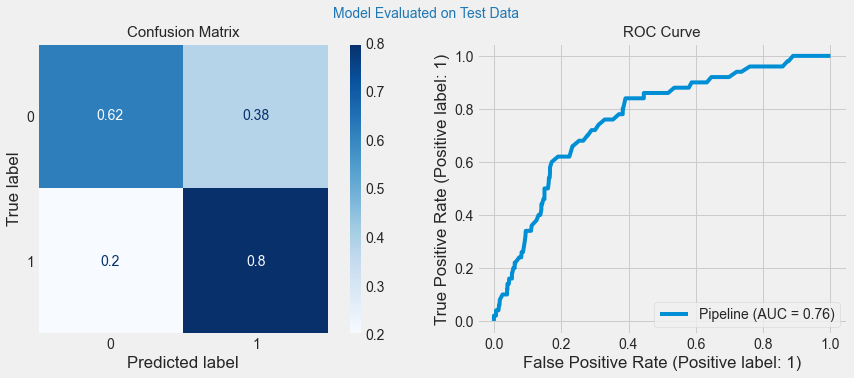

In [42]:
model = ExtraTreesClassifier(random_state=42, 
                             class_weight='balanced', 
                             criterion='entropy', 
                             max_depth=6, 
                             min_samples_leaf=6, 
                             min_samples_split=2)

model_437 = check_model(model, 
                        imputer = sim_immputer,
                        X_train = X_train_7,
                        X_test = X_test_7,
                        use_test_data=True,
                        print_model_details=True,
                        show_classification_report=True,
                        show_plots=True)

2.

LogisticRegression(class_weight={0: 0.048738, 1: 0.951262}, random_state=42)
SimpleImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9821    0.6204    0.7604       972
           1     0.0956    0.7800    0.1703        50

    accuracy                         0.6282      1022
   macro avg     0.5388    0.7002    0.4654      1022
weighted avg     0.9387    0.6282    0.7315      1022

------------------------------------------------------


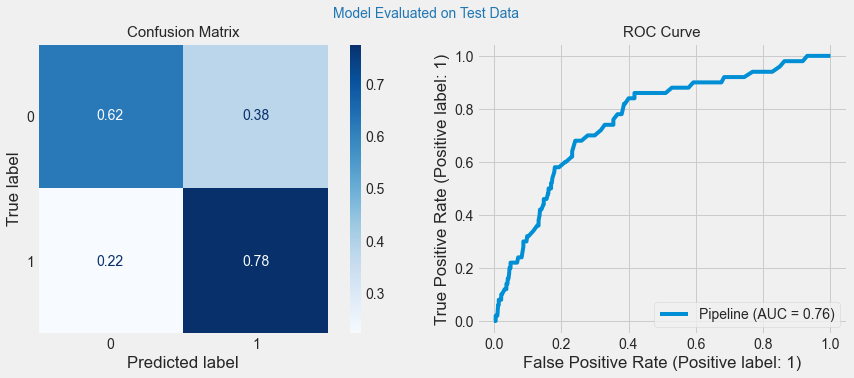

In [43]:
model = LogisticRegression(random_state=42, 
                           C=1.0, 
                           class_weight={0: 0.048738, 1: 0.951262}, 
                           fit_intercept=True, 
                           max_iter=100, 
                           solver='lbfgs')
        
model_365 = check_model(model, 
                        imputer = sim_immputer,
                       X_train = X_train_7,
                       X_test = X_test_7,
                       print_model_details=True,
                       use_test_data=True,
                       show_classification_report=True,
                       show_plots=True)

### 14b. All Categorical Features
**Extract out the top 2. Print the index and corresponding model details.**

In [44]:
four = filter_ranked.index[filter_ranked['df_used']=='all_categorical'].tolist()[:4]
unique_base_models = [base_mod for base_mod in filter_ranked[filter_ranked['df_used']=='all_categorical']\
                      [:4]['base_model'].unique()]
used = []
for i in four:
    if results.iloc[i]['base_model'] not in used:
        print(f"""{i}: 
        model = {results.iloc[i]['final_model_evaluated']}
        imputer = {results.iloc[i]['imputer']}
        smote = {results.iloc[i]['smote']}
        scaler = {results.iloc[i]['scaler']}""")
        used.append(results.iloc[i]['base_model'])

261: 
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2)
        imputer = KNNImputer
        smote = None
        scaler = None
249: 
        model = LogisticRegression(random_state=42, C=1000000000000.0, class_weight='balanced', fit_intercept=True, max_iter=100, solver='lbfgs')
        imputer = KNNImputer
        smote = None
        scaler = None


**For 10 Categorical top two, use `check_model` function to print model details, show classification report, and plot**

1.

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)
KNNImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9863    0.5916    0.7395       972
           1     0.0957    0.8400    0.1718        50

    accuracy                         0.6037      1022
   macro avg     0.5410    0.7158    0.4557      1022
weighted avg     0.9427    0.6037    0.7118      1022

------------------------------------------------------


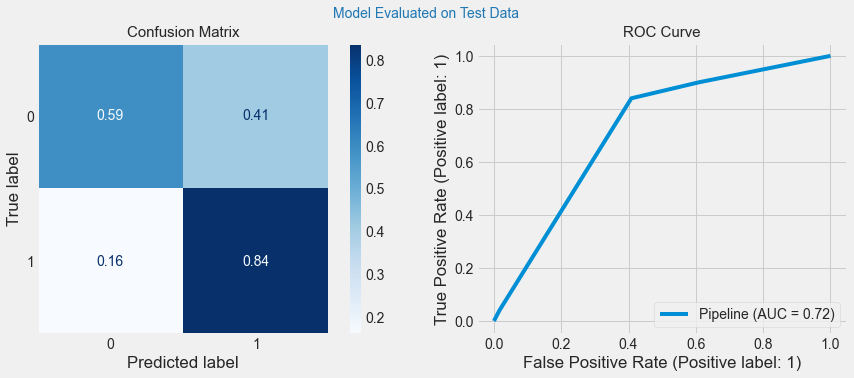

In [45]:
model = DecisionTreeClassifier(random_state=42, 
                               class_weight='balanced', 
                               criterion='gini', 
                               max_depth=2, 
                               min_samples_leaf=1, 
                               min_samples_split=2)

model_261 = check_model(model,
                       imputer=knn_imputer,
                       print_model_details=True,
                       use_test_data=True,
                       show_classification_report=True,
                       show_plots=True)

2.

LogisticRegression(C=1000000000000.0, class_weight='balanced', random_state=42)
KNNImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9835    0.6132    0.7554       972
           1     0.0962    0.8000    0.1717        50

    accuracy                         0.6223      1022
   macro avg     0.5398    0.7066    0.4635      1022
weighted avg     0.9401    0.6223    0.7268      1022

------------------------------------------------------


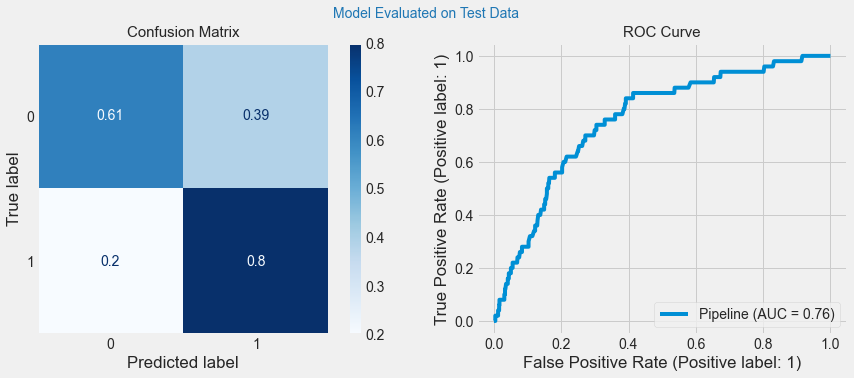

In [46]:
model = LogisticRegression(random_state=42, 
                           C=1000000000000.0, 
                           class_weight='balanced', 
                           fit_intercept=True, 
                           max_iter=100, 
                           solver='lbfgs')

model_249 = check_model(model,
                        imputer=knn_imputer,
                        print_model_details=True,
                        use_test_data=True,
                        show_classification_report=True,
                        show_plots=True)

### 14c. Original data
**Extract out the top 2. Print the index and corresponding model details.**


In [47]:
four = filter_ranked.index[filter_ranked['df_used']=='original'].tolist()[:4]
unique_base_models = [base_mod for base_mod in filter_ranked[filter_ranked['df_used']=='original']\
                      [:4]['base_model'].unique()]
used = []
for i in four:
    if results.iloc[i]['base_model'] not in used:
        print(f"""{i}: 
        model = {results.iloc[i]['final_model_evaluated']}
        imputer = {results.iloc[i]['imputer']}
        smote = {results.iloc[i]['smote']}
        scaler = {results.iloc[i]['scaler']}""")
        used.append(results.iloc[i]['base_model'])
        

47: 
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2)
        imputer = KNNImputer
        smote = SMOTENC
        scaler = StandardScaler
1: 
        model = LogisticRegression(random_state=42, C=1.0, class_weight={0: 0.048738, 1: 0.951262}, fit_intercept=True, max_iter=100, solver='lbfgs')
        imputer = IterativeImputer
        smote = None
        scaler = None


**For Original top two, use `check_model` function to print model details, show classification report, and plot**

1.

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)
KNNImputer()
StandardScaler()
SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6], random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9856    0.5628    0.7164       972
           1     0.0899    0.8400    0.1625        50

    accuracy                         0.5763      1022
   macro avg     0.5378    0.7014    0.4395      1022
weighted avg     0.9418    0.5763    0.6893      1022

------------------------------------------------------


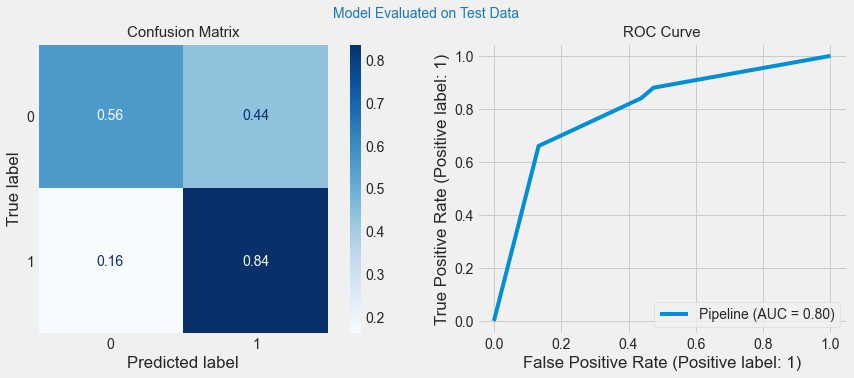

In [48]:
model = DecisionTreeClassifier(random_state=42, 
                               class_weight='balanced', 
                               criterion='gini', 
                               max_depth=2, 
                               min_samples_leaf=1, 
                               min_samples_split=2)

# Get Categorical Column Names
cat_col_names = []
for col in use_this_X_train.columns:
    if (col in use_this_X_train.select_dtypes('object').columns) \
    or (sorted(use_this_X_train[col].unique())==[0,1]):
        cat_col_names.append(col)
                                                        
# Convert cat_col_names to indices      
cat_col_indices = [use_this_X_train.columns.get_loc(col) for col in cat_col_names]

# Use cat_col_indices when instantiating SMOTENC
smote = SMOTENC(categorical_features=cat_col_indices, 
                             random_state=seed)


model_47 = check_model(model, 
                       imputer = knn_imputer,
                       smote = smote,
                       scaler = StandardScaler(),
                       X_train = X_train_original,
                       X_test = X_test_original,
                       print_model_details=True,
                       use_test_data=True,
                       show_classification_report=True,
                       show_plots=True)

2.

LogisticRegression(class_weight={0: 0.048738, 1: 0.951262}, random_state=42)
IterativeImputer(random_state=42)

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9861    0.7325    0.8406       972
           1     0.1333    0.8000    0.2286        50

    accuracy                         0.7358      1022
   macro avg     0.5597    0.7663    0.5346      1022
weighted avg     0.9444    0.7358    0.8107      1022

------------------------------------------------------


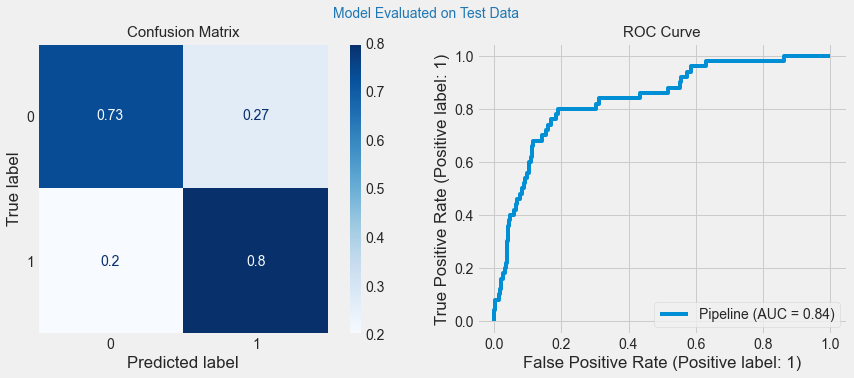

In [49]:
model = LogisticRegression(random_state=42, 
                           C=1.0, class_weight={0: 0.048738, 1: 0.951262}, 
                           fit_intercept=True, 
                           max_iter=100, 
                           solver='lbfgs')

model_1 = check_model(model, 
                      imputer=iter_imputer,
                       X_train = X_train_original,
                       X_test = X_test_original,
                       print_model_details=True,
                       use_test_data=True,
                       show_classification_report=True,
                       show_plots=True)

# 15. Final Model
For the sake of capturing as many true strokes as possible, while maintaining a fairly decent accuracy, I have been using recall as my primary evaluation metric, with the f1 score as the secondary metric. I have filtered by train and test scores that are within 13% of eachother to avoid models that are overfit. 

The best performing 7-feature model captures 80% of the true positive strokes, and 62% of true negatives. 

Bumping up the number of features to 10 did not result in better models. One captured the same 80% of true positives but had a 1% decrease in true negatives. The other captured 84% percent of true positives but even worse true negative of 59%. 

By comparison, the original data yeilded a model that captured the same 80% of true positives and 73% of true negatives. 

Based on Kaiser's target of 7 questions, I have chosen my final model to use 7 features inspite of it's lower true negative rate (compared to original data model). This Final Model is: `ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_leaf=6, random_state=42)` using `SimpleImputer()`. 

Below I will model both training data and test data separately. For each, I will:
- print model details
- show classification report 
- plot confusion matrix and roc curve 

### 15a. Baselines 

ExtraTreesClassifier(random_state=42)
SimpleImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Train Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9597    0.9979    0.9784      3888
           1     0.8182    0.1809    0.2963       199

    accuracy                         0.9582      4087
   macro avg     0.8889    0.5894    0.6374      4087
weighted avg     0.9528    0.9582    0.9452      4087

------------------------------------------------------


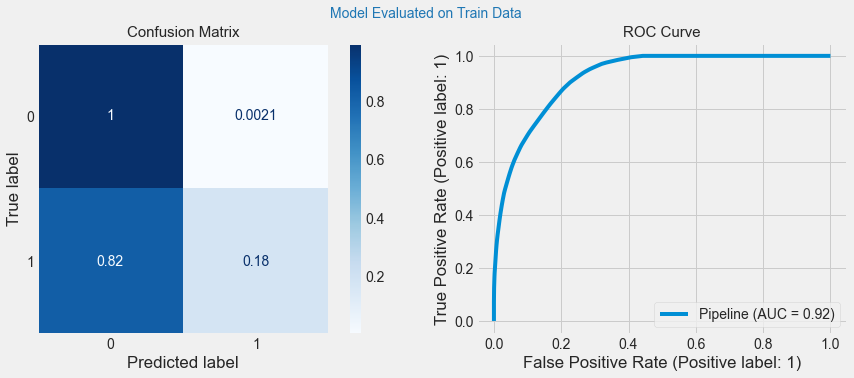

In [50]:
baseline_train = check_model(etr, 
                             imputer=sim_immputer, 
                             X_train=X_train_7,
                             X_test=X_test_7, 
                             print_model_details=True,
                             show_classification_report=True,
                             show_plots=True)

ExtraTreesClassifier(random_state=42)
SimpleImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9528    0.9969    0.9744       972
           1     0.4000    0.0400    0.0727        50

    accuracy                         0.9501      1022
   macro avg     0.6764    0.5185    0.5235      1022
weighted avg     0.9258    0.9501    0.9302      1022

------------------------------------------------------


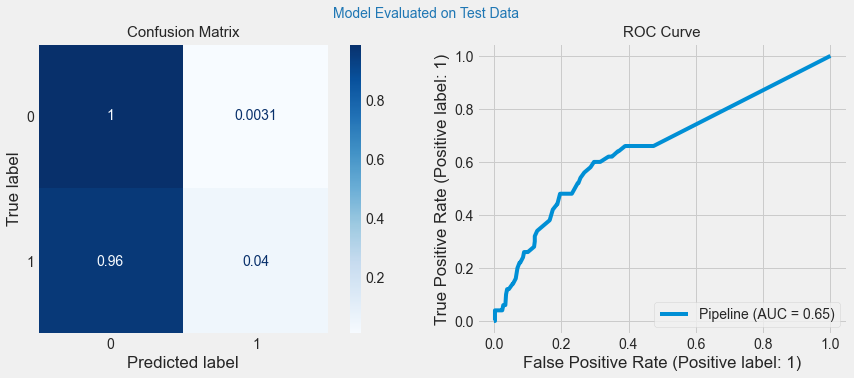

In [51]:
baseline_test = check_model(etr, 
                            imputer=sim_immputer, 
                            X_train=X_train_7,
                            X_test=X_test_7, 
                            use_test_data=True,
                            print_model_details=True,
                            show_classification_report=True,
                            show_plots=True)

### 15b. Adding in GridSearchCV (only using training data to evaluate):

ExtraTreesClassifier(random_state=42, class_weight='balanced', criterion='entropy', max_depth=6, min_samples_leaf=6, min_samples_split=2)
SimpleImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Train Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9943    0.6289    0.7704      3888
           1     0.1136    0.9296    0.2025       199

    accuracy                         0.6435      4087
   macro avg     0.5540    0.7793    0.4865      4087
weighted avg     0.9514    0.6435    0.7428      4087

------------------------------------------------------


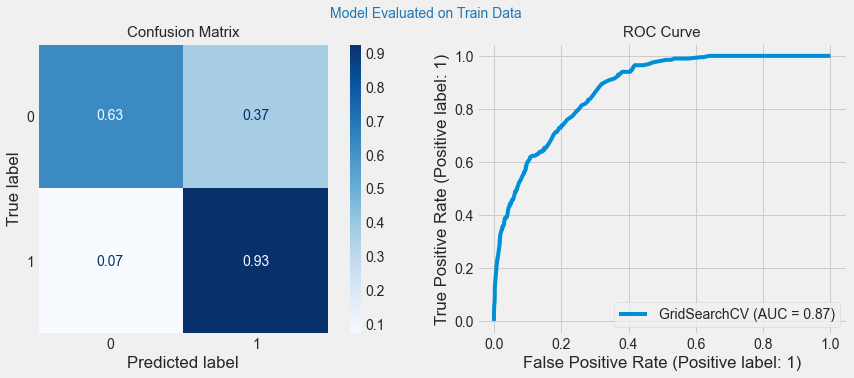

In [52]:
gs_train = check_model(etr,
                       imputer=sim_immputer, 
                       X_train=X_train_7,
                       X_test=X_test_7, 
                       grid_search=x_tree_dict,
                       print_model_details=True,
                       show_classification_report=True,
                       show_plots=True)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=6,
                     min_samples_leaf=6, random_state=42)
SimpleImputer()

------------------------------------------------------
	  CLASSIFICATION REPORT : Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9836    0.6173    0.7585       972
           1     0.0971    0.8000    0.1732        50

    accuracy                         0.6262      1022
   macro avg     0.5403    0.7086    0.4658      1022
weighted avg     0.9402    0.6262    0.7299      1022

------------------------------------------------------
------------------------------------------------------
		  THRESHOLD STATS
------------------------------------------------------
AUC: 0.7646502057613168
- - - - - - - - - - - - - - - - - - - - - - - 
THRESHOLD: 1.88 | FPR: 0.00%, TPR:0.00%
THRESHOLD: 0.88 | FPR: 0.00%, TPR:2.00%
THRESHOLD: 0.87 | FPR: 0.21%, TPR:2

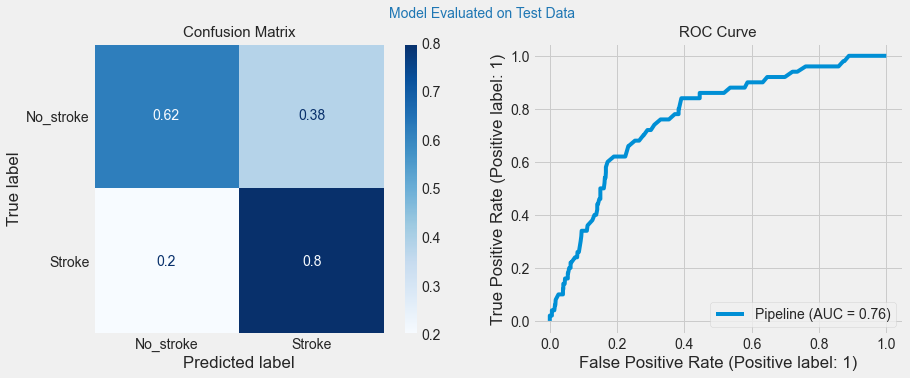

In [53]:
gs_test = check_model(ExtraTreesClassifier(random_state=42, 
                                           class_weight='balanced', 
                                           criterion='entropy', 
                                           max_depth=6, 
                                           min_samples_leaf=6, 
                                           min_samples_split=2), 
                      imputer=sim_immputer, 
                      X_train=X_train_7,
                      X_test=X_test_7, 
                      use_test_data=True,
                      print_model_details=True,
                      show_thresholds_table=True, 
                      show_classification_report=True,
                      show_plots=True, 
                      display_labels=['No_stroke', 'Stroke'])

# NOTE: min_samples_split=2 will not print as this is a default parameter and default parameters are not 
# printed when fed directly into the function

### '15. Final Model' NOTES:
This model captures 80% of stroke patients. That means 20% of patients who did in fact have a stroke were missed. 
Of patients who did not have a stroke, the model captured 62%. Meaning 38% of those no stroke patients were incorrectly predicted as having a stroke. By shifting the decision threshold of the classifer this model can increase the percent of true positives (decrease percent of false negatives) to capture more stroke patients, but note, that this will result in an increase in false positives (see above THRESHOLDS STATS). This will come down to Kasier's desire to be more or less aggressive with the predictions. I would suggest, based on the disclaimer of, "this is not an official diagnosis and is instead meant to direct people to conversations with their primary physician" that they take a more aggressive stance on predictions. 

# Next Steps
At the very least, I would adjust the decision threshold of this final classifier to get true positive rate up to 84%. This 4% increase in true positives would only result in a 1% increase in false positives (see THRESHOLD: 0.50 | FPR: 39.09%, TPR:84.00%) and I feel that small, 1% increase justifies the adjustment. 

I would also re tune the hyper parameters with a new gridsearch dictionary with values around the hyper parameters of this final model to see if somewhere in the gaps of orginal grid search there are better hyper perameters that will increase true positive rate and decrease the false positive rate. 

Going forward, a more explicitly defined comfort range for false positives might result in a larger criteria range when selecting top performing models, which therefore may yeild higher true positives.

Check with marketing team to see if modeling with more features is an option. For example, 8 features fits nicely with "80% of strokes are preventable." 

Other options are to remodel with age broken into more than the binary 50+ "Yes" or "No."


# Thank You
Let's work together, 

   - Email: cassigroesbeck@emailplace.com

   - GitHub: [@AgathaZareth](https://github.com/AgathaZareth)

   - LinkedIn: [Cassarra Groesbeck](linkedin.com/in/cassarra-groesbeck-a64b75229)




# Pickle `results` df

In [54]:
#pd.to_pickle(results, "./results_df.pkl")

### To unpickle

In [55]:
#results = pd.read_pickle("./results_df.pkl") 